In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.integrate as integrate
from tqdm.auto import tqdm

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
plt.style.use("default")
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
    }
)

n_dense_points = 201

In [ ]:
class MLP(nn.Module):
    def __init__(self, *features, activation=nn.Tanh):
        super().__init__()

        layers = []
        for in_features, out_features in zip(features, features[1:]):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(activation())
        self.network = nn.Sequential(*layers[:-1])

    def forward(self, x):
        return self.network(x)

In [ ]:
def grad(outputs, inputs):
    return torch.autograd.grad(outputs.sum(), inputs, create_graph=True)[0]

In [ ]:
domain=(0,1)

$$
-\epsilon y''-kxy'+cy=\left(ϵπ^2+πkx+λ\right)\sin πx+\left(ϵ\pi^2-πkx+\lambda\right)\cos πx\\
y(0)=1,\quad y(1)=-1
$$

In [ ]:
eps=1
k=7

In [ ]:
C=np.arange(0,750,5)

In [ ]:
DATA71=[]
DATA72=[]
RATIO7=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)-2*t+1
        y_e = torch.sin(np.pi*t)+torch.cos(np.pi*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt+k*t*y_t-c*y+(eps*np.pi**2+np.pi*k*t+c)*torch.sin(np.pi*t)+(eps*np.pi**2-np.pi*k*t+c)*torch.cos(np.pi*t), torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA71.append(realloss.item())
            DATA72.append(loss.item())
            RATIO7.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 126.8706
epoch = 50, loss_de = 0.4448
epoch = 100, loss_de = 0.0988
epoch = 150, loss_de = 0.0961
epoch = 200, loss_de = 0.0843
epoch = 250, loss_de = 0.0887
epoch = 300, loss_de = 0.0929
epoch = 350, loss_de = 0.0886
epoch = 400, loss_de = 0.0880
epoch = 450, loss_de = 0.0911
9.242699889000505e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 216.1546
epoch = 50, loss_de = 0.3843
epoch = 100, loss_de = 0.1095
epoch = 150, loss_de = 0.1094
epoch = 200, loss_de = 0.1001
epoch = 250, loss_de = 0.1027
epoch = 300, loss_de = 0.1074
epoch = 350, loss_de = 0.1034
epoch = 400, loss_de = 0.1028
epoch = 450, loss_de = 0.1052
3.654634156191605e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 331.3106
epoch = 50, loss_de = 0.3264
epoch = 100, loss_de = 0.1105
epoch = 150, loss_de = 0.1131
epoch = 200, loss_de = 0.1010
epoch = 250, loss_de = 0.1058
epoch = 300, loss_de = 0.1108
epoch = 350, loss_de = 0.1056
epoch = 400, loss_de = 0.1055
epoch = 450, loss_de = 0.1085
1.8528021428210195e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 472.3386
epoch = 50, loss_de = 0.3078
epoch = 100, loss_de = 0.0955
epoch = 150, loss_de = 0.0989
epoch = 200, loss_de = 0.0875
epoch = 250, loss_de = 0.0933
epoch = 300, loss_de = 0.0977
epoch = 350, loss_de = 0.0932
epoch = 400, loss_de = 0.0926
epoch = 450, loss_de = 0.0958
8.856034128257306e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 639.2385
epoch = 50, loss_de = 0.2298
epoch = 100, loss_de = 0.0687
epoch = 150, loss_de = 0.0705
epoch = 200, loss_de = 0.0632
epoch = 250, loss_de = 0.0669
epoch = 300, loss_de = 0.0699
epoch = 350, loss_de = 0.0678
epoch = 400, loss_de = 0.0661
epoch = 450, loss_de = 0.0688
3.5338209158908285e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 832.0104
epoch = 50, loss_de = 0.6352
epoch = 100, loss_de = 0.1265
epoch = 150, loss_de = 0.1046
epoch = 200, loss_de = 0.0928
epoch = 250, loss_de = 0.0935
epoch = 300, loss_de = 0.0956
epoch = 350, loss_de = 0.0938
epoch = 400, loss_de = 0.0914
epoch = 450, loss_de = 0.0937
4.428394504429889e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1050.6543
epoch = 50, loss_de = 1.3211
epoch = 100, loss_de = 0.1109
epoch = 150, loss_de = 0.0931
epoch = 200, loss_de = 0.0836
epoch = 250, loss_de = 0.0850
epoch = 300, loss_de = 0.0865
epoch = 350, loss_de = 0.0856
epoch = 400, loss_de = 0.0830
epoch = 450, loss_de = 0.0862
2.566762589140126e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1295.1702
epoch = 50, loss_de = 2.1626
epoch = 100, loss_de = 0.7459
epoch = 150, loss_de = 0.6209
epoch = 200, loss_de = 0.5911
epoch = 250, loss_de = 0.5515
epoch = 300, loss_de = 0.5817
epoch = 350, loss_de = 0.5427
epoch = 400, loss_de = 0.5497
epoch = 450, loss_de = 0.5636
7.505638677685056e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1565.5579
epoch = 50, loss_de = 17.6811
epoch = 100, loss_de = 8.3709
epoch = 150, loss_de = 6.5840
epoch = 200, loss_de = 6.2119
epoch = 250, loss_de = 5.7943
epoch = 300, loss_de = 5.9539
epoch = 350, loss_de = 5.5911
epoch = 400, loss_de = 5.7639
epoch = 450, loss_de = 5.7060
0.00015942267782520503


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1861.8176
epoch = 50, loss_de = 28.3178
epoch = 100, loss_de = 11.8420
epoch = 150, loss_de = 8.9675
epoch = 200, loss_de = 8.3400
epoch = 250, loss_de = 7.7602
epoch = 300, loss_de = 7.9415
epoch = 350, loss_de = 7.4642
epoch = 400, loss_de = 7.6788
epoch = 450, loss_de = 7.5993
0.00019083826919086277


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2183.9495
epoch = 50, loss_de = 36.4040
epoch = 100, loss_de = 14.9676
epoch = 150, loss_de = 11.3523
epoch = 200, loss_de = 10.5691
epoch = 250, loss_de = 9.8459
epoch = 300, loss_de = 10.0871
epoch = 350, loss_de = 9.4509
epoch = 400, loss_de = 9.7298
epoch = 450, loss_de = 9.6175
0.0002299457264598459


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2531.9531
epoch = 50, loss_de = 124.9889
epoch = 100, loss_de = 31.3720
epoch = 150, loss_de = 21.9781
epoch = 200, loss_de = 19.9289
epoch = 250, loss_de = 18.4866
epoch = 300, loss_de = 18.8610
epoch = 350, loss_de = 17.6402
epoch = 400, loss_de = 18.1297
epoch = 450, loss_de = 17.9069
0.0004704735183622688


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2905.8289
epoch = 50, loss_de = 160.8895
epoch = 100, loss_de = 39.0415
epoch = 150, loss_de = 27.3036
epoch = 200, loss_de = 24.7091
epoch = 250, loss_de = 22.9427
epoch = 300, loss_de = 23.3798
epoch = 350, loss_de = 21.8926
epoch = 400, loss_de = 22.4758
epoch = 450, loss_de = 22.2089
0.0005562204169109464


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3305.5764
epoch = 50, loss_de = 364.1146
epoch = 100, loss_de = 77.8083
epoch = 150, loss_de = 47.6738
epoch = 200, loss_de = 41.7162
epoch = 250, loss_de = 38.4041
epoch = 300, loss_de = 38.9474
epoch = 350, loss_de = 36.4600
epoch = 400, loss_de = 37.3870
epoch = 450, loss_de = 36.9447
0.001029493985697627


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3731.1960
epoch = 50, loss_de = 392.5203
epoch = 100, loss_de = 394.2206
epoch = 150, loss_de = 387.8469
epoch = 200, loss_de = 275.8404
epoch = 250, loss_de = 227.1659
epoch = 300, loss_de = 222.8646
epoch = 350, loss_de = 210.4849
epoch = 400, loss_de = 214.5212
epoch = 450, loss_de = 212.7294
0.011046095751225948


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4182.6875
epoch = 50, loss_de = 420.9442
epoch = 100, loss_de = 422.5698
epoch = 150, loss_de = 419.2108
epoch = 200, loss_de = 427.7487
epoch = 250, loss_de = 417.1458
epoch = 300, loss_de = 424.9868
epoch = 350, loss_de = 412.5709
epoch = 400, loss_de = 421.3460
epoch = 450, loss_de = 419.1728
0.023681361228227615


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4660.0513
epoch = 50, loss_de = 450.4930
epoch = 100, loss_de = 452.0301
epoch = 150, loss_de = 448.4602
epoch = 200, loss_de = 457.5238
epoch = 250, loss_de = 446.1849
epoch = 300, loss_de = 454.2540
epoch = 350, loss_de = 441.5716
epoch = 400, loss_de = 450.8788
epoch = 450, loss_de = 448.6610
0.023608429357409477


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5163.2866
epoch = 50, loss_de = 481.1780
epoch = 100, loss_de = 482.6162
epoch = 150, loss_de = 478.8280
epoch = 200, loss_de = 488.4315
epoch = 250, loss_de = 476.3397
epoch = 300, loss_de = 484.6281
epoch = 350, loss_de = 471.6956
epoch = 400, loss_de = 481.5487
epoch = 450, loss_de = 479.2846
0.02355280891060829


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5692.3940
epoch = 50, loss_de = 513.0080
epoch = 100, loss_de = 514.3368
epoch = 150, loss_de = 510.3228
epoch = 200, loss_de = 520.4811
epoch = 250, loss_de = 507.6186
epoch = 300, loss_de = 516.1187
epoch = 350, loss_de = 502.9508
epoch = 400, loss_de = 513.3644
epoch = 450, loss_de = 511.0519
0.023509934544563293


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6247.3730
epoch = 50, loss_de = 545.9894
epoch = 100, loss_de = 547.1990
epoch = 150, loss_de = 542.9514
epoch = 200, loss_de = 553.6801
epoch = 250, loss_de = 540.0282
epoch = 300, loss_de = 548.7333
epoch = 350, loss_de = 535.3433
epoch = 400, loss_de = 546.3329
epoch = 450, loss_de = 543.9697
0.02347658947110176


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6828.2246
epoch = 50, loss_de = 582.6490
epoch = 100, loss_de = 581.2534
epoch = 150, loss_de = 576.7206
epoch = 200, loss_de = 588.0294
epoch = 250, loss_de = 573.5689
epoch = 300, loss_de = 582.4728
epoch = 350, loss_de = 568.8728
epoch = 400, loss_de = 580.4541
epoch = 450, loss_de = 578.0383
0.023450205102562904


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7434.9482
epoch = 50, loss_de = 618.1721
epoch = 100, loss_de = 616.4182
epoch = 150, loss_de = 611.6336
epoch = 200, loss_de = 623.5450
epoch = 250, loss_de = 608.2568
epoch = 300, loss_de = 617.3550
epoch = 350, loss_de = 603.5565
epoch = 400, loss_de = 615.7457
epoch = 450, loss_de = 613.2752
0.023429660126566887


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8067.5439
epoch = 50, loss_de = 654.8689
epoch = 100, loss_de = 652.7379
epoch = 150, loss_de = 647.6927
epoch = 200, loss_de = 660.2226
epoch = 250, loss_de = 644.0856
epoch = 300, loss_de = 653.3730
epoch = 350, loss_de = 639.3866
epoch = 400, loss_de = 652.2001
epoch = 450, loss_de = 649.6726
0.023413199931383133


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8726.0107
epoch = 50, loss_de = 692.7423
epoch = 100, loss_de = 690.2156
epoch = 150, loss_de = 684.9015
epoch = 200, loss_de = 698.0665
epoch = 250, loss_de = 681.0599
epoch = 300, loss_de = 690.5320
epoch = 350, loss_de = 676.3677
epoch = 400, loss_de = 689.8225
epoch = 450, loss_de = 687.2360
0.02340000681579113


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9410.3506
epoch = 50, loss_de = 731.7944
epoch = 100, loss_de = 728.8536
epoch = 150, loss_de = 723.2625
epoch = 200, loss_de = 737.0792
epoch = 250, loss_de = 719.1822
epoch = 300, loss_de = 728.8356
epoch = 350, loss_de = 714.5025
epoch = 400, loss_de = 728.6155
epoch = 450, loss_de = 725.9676
0.02338937297463417


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10120.5615
epoch = 50, loss_de = 772.0275
epoch = 100, loss_de = 768.6545
epoch = 150, loss_de = 762.7777
epoch = 200, loss_de = 777.2632
epoch = 250, loss_de = 758.4546
epoch = 300, loss_de = 768.2850
epoch = 350, loss_de = 753.7926
epoch = 400, loss_de = 768.5807
epoch = 450, loss_de = 765.8696
0.023380765691399574


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10856.6436
epoch = 50, loss_de = 813.4430
epoch = 100, loss_de = 809.6195
epoch = 150, loss_de = 803.4488
epoch = 200, loss_de = 818.6205
epoch = 250, loss_de = 798.8783
epoch = 300, loss_de = 808.8828
epoch = 350, loss_de = 794.2394
epoch = 400, loss_de = 809.7204
epoch = 450, loss_de = 806.9437
0.023373784497380257


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11618.5996
epoch = 50, loss_de = 856.0428
epoch = 100, loss_de = 851.7500
epoch = 150, loss_de = 845.2776
epoch = 200, loss_de = 861.1521
epoch = 250, loss_de = 840.4548
epoch = 300, loss_de = 850.6303
epoch = 350, loss_de = 835.8445
epoch = 400, loss_de = 852.0353
epoch = 450, loss_de = 849.1912
0.02336808480322361


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12406.4268
epoch = 50, loss_de = 899.8274
epoch = 100, loss_de = 895.0475
epoch = 150, loss_de = 888.2645
epoch = 200, loss_de = 904.8595
epoch = 250, loss_de = 883.1853
epoch = 300, loss_de = 893.5289
epoch = 350, loss_de = 878.6085
epoch = 400, loss_de = 895.5270
epoch = 450, loss_de = 892.6130
0.023363430052995682


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13220.1260
epoch = 50, loss_de = 944.7982
epoch = 100, loss_de = 939.5130
epoch = 150, loss_de = 932.4111
epoch = 200, loss_de = 949.7442
epoch = 250, loss_de = 927.0706
epoch = 300, loss_de = 937.5797
epoch = 350, loss_de = 922.5326
epoch = 400, loss_de = 940.1962
epoch = 450, loss_de = 937.2107
0.02335963025689125


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14059.6973
epoch = 50, loss_de = 990.9560
epoch = 100, loss_de = 985.1470
epoch = 150, loss_de = 977.7181
epoch = 200, loss_de = 995.8064
epoch = 250, loss_de = 972.1114
epoch = 300, loss_de = 982.7833
epoch = 350, loss_de = 967.6174
epoch = 400, loss_de = 986.0442
epoch = 450, loss_de = 982.9843
0.023356502875685692


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14925.1396
epoch = 50, loss_de = 1038.3014
epoch = 100, loss_de = 1031.9507
epoch = 150, loss_de = 1024.1862
epoch = 200, loss_de = 1043.0474
epoch = 250, loss_de = 1018.3089
epoch = 300, loss_de = 1029.1407
epoch = 350, loss_de = 1013.8638
epoch = 400, loss_de = 1033.0714
epoch = 450, loss_de = 1029.9353
0.02335394360125065


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15816.4531
epoch = 50, loss_de = 1086.8347
epoch = 100, loss_de = 1079.9247
epoch = 150, loss_de = 1071.8158
epoch = 200, loss_de = 1091.4678
epoch = 250, loss_de = 1065.6630
epoch = 300, loss_de = 1076.6527
epoch = 350, loss_de = 1061.2716
epoch = 400, loss_de = 1081.2784
epoch = 450, loss_de = 1078.0640
0.023351842537522316


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16733.6406
epoch = 50, loss_de = 1136.5575
epoch = 100, loss_de = 1129.0690
epoch = 150, loss_de = 1120.6080
epoch = 200, loss_de = 1141.0682
epoch = 250, loss_de = 1114.1746
epoch = 300, loss_de = 1125.3198
epoch = 350, loss_de = 1109.8418
epoch = 400, loss_de = 1130.6654
epoch = 450, loss_de = 1127.3708
0.023350123316049576


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17676.7012
epoch = 50, loss_de = 1187.4694
epoch = 100, loss_de = 1179.3846
epoch = 150, loss_de = 1170.5625
epoch = 200, loss_de = 1191.8488
epoch = 250, loss_de = 1163.8439
epoch = 300, loss_de = 1175.1427
epoch = 350, loss_de = 1159.5754
epoch = 400, loss_de = 1181.2335
epoch = 450, loss_de = 1177.8567
0.02334870770573616


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18645.6328
epoch = 50, loss_de = 1239.5706
epoch = 100, loss_de = 1230.8723
epoch = 150, loss_de = 1221.6809
epoch = 200, loss_de = 1243.8107
epoch = 250, loss_de = 1214.6715
epoch = 300, loss_de = 1226.1215
epoch = 350, loss_de = 1210.4719
epoch = 400, loss_de = 1232.9829
epoch = 450, loss_de = 1229.5211
0.023347564041614532


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19640.4316
epoch = 50, loss_de = 1292.8622
epoch = 100, loss_de = 1283.5319
epoch = 150, loss_de = 1273.9623
epoch = 200, loss_de = 1296.9536
epoch = 250, loss_de = 1266.6577
epoch = 300, loss_de = 1278.2571
epoch = 350, loss_de = 1262.5319
epoch = 400, loss_de = 1285.9138
epoch = 450, loss_de = 1282.3656
0.023346634581685066


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 20661.1094
epoch = 50, loss_de = 1347.3436
epoch = 100, loss_de = 1337.3634
epoch = 150, loss_de = 1327.4080
epoch = 200, loss_de = 1351.2786
epoch = 250, loss_de = 1319.8029
epoch = 300, loss_de = 1331.5498
epoch = 350, loss_de = 1315.7555
epoch = 400, loss_de = 1340.0261
epoch = 450, loss_de = 1336.3894
0.023345883935689926


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21707.6562
epoch = 50, loss_de = 1403.0166
epoch = 100, loss_de = 1392.3678
epoch = 150, loss_de = 1382.0175
epoch = 200, loss_de = 1406.7852
epoch = 250, loss_de = 1374.1074
epoch = 300, loss_de = 1385.9991
epoch = 350, loss_de = 1370.1429
epoch = 400, loss_de = 1395.3209
epoch = 450, loss_de = 1391.5936
0.023345284163951874


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 22780.0742
epoch = 50, loss_de = 1459.8798
epoch = 100, loss_de = 1448.5446
epoch = 150, loss_de = 1437.7917
epoch = 200, loss_de = 1463.4746
epoch = 250, loss_de = 1429.5709
epoch = 300, loss_de = 1441.6062
epoch = 350, loss_de = 1425.6949
epoch = 400, loss_de = 1451.7979
epoch = 450, loss_de = 1447.9778
0.02334480918943882


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23878.3652
epoch = 50, loss_de = 1517.9344
epoch = 100, loss_de = 1505.8958
epoch = 150, loss_de = 1494.7299
epoch = 200, loss_de = 1521.3461
epoch = 250, loss_de = 1486.1938
epoch = 300, loss_de = 1498.3710
epoch = 350, loss_de = 1482.4110
epoch = 400, loss_de = 1509.4579
epoch = 450, loss_de = 1505.5428
0.02334444224834442


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 25002.5273
epoch = 50, loss_de = 1577.1803
epoch = 100, loss_de = 1564.4189
epoch = 150, loss_de = 1552.8334
epoch = 200, loss_de = 1580.4005
epoch = 250, loss_de = 1543.9768
epoch = 300, loss_de = 1556.2939
epoch = 350, loss_de = 1540.2917
epoch = 400, loss_de = 1568.3008
epoch = 450, loss_de = 1564.2887
0.023344160988926888


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26152.5625
epoch = 50, loss_de = 1637.6180
epoch = 100, loss_de = 1624.1165
epoch = 150, loss_de = 1612.1022
epoch = 200, loss_de = 1640.6379
epoch = 250, loss_de = 1602.9197
epoch = 300, loss_de = 1615.3746
epoch = 350, loss_de = 1599.3378
epoch = 400, loss_de = 1628.3265
epoch = 450, loss_de = 1624.2152
0.02334396168589592


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 27328.4707
epoch = 50, loss_de = 1699.2466
epoch = 100, loss_de = 1684.9872
epoch = 150, loss_de = 1672.5363
epoch = 200, loss_de = 1702.0583
epoch = 250, loss_de = 1663.0227
epoch = 300, loss_de = 1675.6140
epoch = 350, loss_de = 1659.5480
epoch = 400, loss_de = 1689.5352
epoch = 450, loss_de = 1685.3230
0.023343823850154877


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28530.2461
epoch = 50, loss_de = 1762.0677
epoch = 100, loss_de = 1747.0320
epoch = 150, loss_de = 1734.1348
epoch = 200, loss_de = 1764.6628
epoch = 250, loss_de = 1724.2858
epoch = 300, loss_de = 1737.0116
epoch = 350, loss_de = 1720.9236
epoch = 400, loss_de = 1751.9274
epoch = 450, loss_de = 1747.6118
0.023343738168478012


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29757.8984
epoch = 50, loss_de = 1826.0804
epoch = 100, loss_de = 1810.2509
epoch = 150, loss_de = 1796.8992
epoch = 200, loss_de = 1828.4492
epoch = 250, loss_de = 1786.7090
epoch = 300, loss_de = 1799.5680
epoch = 350, loss_de = 1783.4640
epoch = 400, loss_de = 1815.5032
epoch = 450, loss_de = 1811.0820
0.02334369719028473


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31011.4199
epoch = 50, loss_de = 1891.2856
epoch = 100, loss_de = 1874.6432
epoch = 150, loss_de = 1860.8292
epoch = 200, loss_de = 1893.4204
epoch = 250, loss_de = 1850.2928
epoch = 300, loss_de = 1863.2834
epoch = 350, loss_de = 1847.1696
epoch = 400, loss_de = 1880.2620
epoch = 450, loss_de = 1875.7336
0.023343682289123535


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32290.8125
epoch = 50, loss_de = 1957.6823
epoch = 100, loss_de = 1940.2102
epoch = 150, loss_de = 1925.9250
epoch = 200, loss_de = 1959.5748
epoch = 250, loss_de = 1915.0370
epoch = 300, loss_de = 1928.1569
epoch = 350, loss_de = 1912.0413
epoch = 400, loss_de = 1946.2046
epoch = 450, loss_de = 1941.5673
0.023343706503510475


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33596.0820
epoch = 50, loss_de = 2025.2719
epoch = 100, loss_de = 2006.9512
epoch = 150, loss_de = 1992.1866
epoch = 200, loss_de = 2026.9132
epoch = 250, loss_de = 1980.9420
epoch = 300, loss_de = 1994.1898
epoch = 350, loss_de = 1978.0778
epoch = 400, loss_de = 2013.3304
epoch = 450, loss_de = 2008.5818
0.0233437642455101


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34927.2188
epoch = 50, loss_de = 2094.0532
epoch = 100, loss_de = 2074.8667
epoch = 150, loss_de = 2059.6130
epoch = 200, loss_de = 2095.4353
epoch = 250, loss_de = 2048.0081
epoch = 300, loss_de = 2061.3818
epoch = 350, loss_de = 2045.2791
epoch = 400, loss_de = 2081.6416
epoch = 450, loss_de = 2076.7786
0.02334383875131607


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36284.2266
epoch = 50, loss_de = 2164.0269
epoch = 100, loss_de = 2143.9568
epoch = 150, loss_de = 2128.2070
epoch = 200, loss_de = 2165.1414
epoch = 250, loss_de = 2116.2339
epoch = 300, loss_de = 2129.7329
epoch = 350, loss_de = 2113.6467
epoch = 400, loss_de = 2151.1350
epoch = 450, loss_de = 2146.1575
0.023343928158283234


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37667.1094
epoch = 50, loss_de = 2235.1938
epoch = 100, loss_de = 2214.2212
epoch = 150, loss_de = 2197.9656
epoch = 200, loss_de = 2236.0310
epoch = 250, loss_de = 2185.6208
epoch = 300, loss_de = 2199.2439
epoch = 350, loss_de = 2183.1797
epoch = 400, loss_de = 2221.8130
epoch = 450, loss_de = 2216.7173
0.023344028741121292


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39075.8672
epoch = 50, loss_de = 2307.5525
epoch = 100, loss_de = 2285.6604
epoch = 150, loss_de = 2268.8911
epoch = 200, loss_de = 2308.1055
epoch = 250, loss_de = 2256.1687
epoch = 300, loss_de = 2269.9131
epoch = 350, loss_de = 2253.8772
epoch = 400, loss_de = 2293.6748
epoch = 450, loss_de = 2288.4600
0.02334415540099144


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40510.4883
epoch = 50, loss_de = 2381.1035
epoch = 100, loss_de = 2358.2732
epoch = 150, loss_de = 2340.9822
epoch = 200, loss_de = 2381.3640
epoch = 250, loss_de = 2327.8767
epoch = 300, loss_de = 2341.7417
epoch = 350, loss_de = 2325.7422
epoch = 400, loss_de = 2366.7205
epoch = 450, loss_de = 2361.3840
0.02334427461028099


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41970.9883
epoch = 50, loss_de = 2455.8477
epoch = 100, loss_de = 2432.0627
epoch = 150, loss_de = 2414.2405
epoch = 200, loss_de = 2455.8069
epoch = 250, loss_de = 2400.7466
epoch = 300, loss_de = 2414.7297
epoch = 350, loss_de = 2398.7715
epoch = 400, loss_de = 2440.9507
epoch = 450, loss_de = 2435.4905
0.023344406858086586


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43457.3594
epoch = 50, loss_de = 2531.7842
epoch = 100, loss_de = 2507.0251
epoch = 150, loss_de = 2488.6636
epoch = 200, loss_de = 2531.4343
epoch = 250, loss_de = 2474.7783
epoch = 300, loss_de = 2488.8777
epoch = 350, loss_de = 2472.9673
epoch = 400, loss_de = 2516.3652
epoch = 450, loss_de = 2510.7788
0.023344557732343674


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 44969.6016
epoch = 50, loss_de = 2608.9148
epoch = 100, loss_de = 2583.1631
epoch = 150, loss_de = 2564.2542
epoch = 200, loss_de = 2608.2458
epoch = 250, loss_de = 2549.9702
epoch = 300, loss_de = 2564.1848
epoch = 350, loss_de = 2548.3289
epoch = 400, loss_de = 2592.9631
epoch = 450, loss_de = 2587.2500
0.023344706743955612


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46507.7188
epoch = 50, loss_de = 2687.2371
epoch = 100, loss_de = 2660.4756
epoch = 150, loss_de = 2641.0105
epoch = 200, loss_de = 2686.2407
epoch = 250, loss_de = 2626.3223
epoch = 300, loss_de = 2640.6523
epoch = 350, loss_de = 2624.8555
epoch = 400, loss_de = 2670.7466
epoch = 450, loss_de = 2664.9033
0.023344852030277252


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48071.7070
epoch = 50, loss_de = 2766.7524
epoch = 100, loss_de = 2738.9639
epoch = 150, loss_de = 2718.9329
epoch = 200, loss_de = 2765.4209
epoch = 250, loss_de = 2703.8364
epoch = 300, loss_de = 2718.2783
epoch = 350, loss_de = 2702.5486
epoch = 400, loss_de = 2749.7141
epoch = 450, loss_de = 2743.7383
0.02334500476717949


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 49661.5625
epoch = 50, loss_de = 2847.4604
epoch = 100, loss_de = 2818.6260
epoch = 150, loss_de = 2798.0210
epoch = 200, loss_de = 2845.7866
epoch = 250, loss_de = 2782.5107
epoch = 300, loss_de = 2797.0657
epoch = 350, loss_de = 2781.4087
epoch = 400, loss_de = 2829.8643
epoch = 450, loss_de = 2823.7551
0.023345163092017174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51277.2891
epoch = 50, loss_de = 2929.3613
epoch = 100, loss_de = 2899.4636
epoch = 150, loss_de = 2878.2764
epoch = 200, loss_de = 2927.3352
epoch = 250, loss_de = 2862.3472
epoch = 300, loss_de = 2877.0115
epoch = 350, loss_de = 2861.4324
epoch = 400, loss_de = 2911.2000
epoch = 450, loss_de = 2904.9543
0.02334531769156456


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52918.8945
epoch = 50, loss_de = 3012.4553
epoch = 100, loss_de = 2981.4751
epoch = 150, loss_de = 2959.6992
epoch = 200, loss_de = 3010.0688
epoch = 250, loss_de = 2943.3440
epoch = 300, loss_de = 2958.1167
epoch = 350, loss_de = 2942.6240
epoch = 400, loss_de = 2993.7195
epoch = 450, loss_de = 2987.3372
0.023345474153757095


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54586.3672
epoch = 50, loss_de = 3096.7419
epoch = 100, loss_de = 3064.6631
epoch = 150, loss_de = 3042.2871
epoch = 200, loss_de = 3093.9873
epoch = 250, loss_de = 3025.5032
epoch = 300, loss_de = 3040.3821
epoch = 350, loss_de = 3024.9810
epoch = 400, loss_de = 3077.4248
epoch = 450, loss_de = 3070.9016
0.02334563061594963


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56279.7109
epoch = 50, loss_de = 3182.2219
epoch = 100, loss_de = 3149.0261
epoch = 150, loss_de = 3126.0417
epoch = 200, loss_de = 3179.0901
epoch = 250, loss_de = 3108.8235
epoch = 300, loss_de = 3123.8059
epoch = 350, loss_de = 3108.5024
epoch = 400, loss_de = 3162.3137
epoch = 450, loss_de = 3155.6487
0.023345785215497017


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 57998.9258
epoch = 50, loss_de = 3268.8955
epoch = 100, loss_de = 3234.5635
epoch = 150, loss_de = 3210.9639
epoch = 200, loss_de = 3265.3782
epoch = 250, loss_de = 3193.3044
epoch = 300, loss_de = 3208.3926
epoch = 350, loss_de = 3193.1917
epoch = 400, loss_de = 3248.3870
epoch = 450, loss_de = 3241.5776
0.023345936089754105


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59744.0195
epoch = 50, loss_de = 3356.7617
epoch = 100, loss_de = 3321.2759
epoch = 150, loss_de = 3297.0508
epoch = 200, loss_de = 3352.8503
epoch = 250, loss_de = 3278.9463
epoch = 300, loss_de = 3294.1370
epoch = 350, loss_de = 3279.0471
epoch = 400, loss_de = 3335.6448
epoch = 450, loss_de = 3328.6892
0.023346103727817535


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61514.9805
epoch = 50, loss_de = 3445.8184
epoch = 100, loss_de = 3409.1641
epoch = 150, loss_de = 3384.3059
epoch = 200, loss_de = 3441.5071
epoch = 250, loss_de = 3365.7512
epoch = 300, loss_de = 3381.0415
epoch = 350, loss_de = 3366.0691
epoch = 400, loss_de = 3424.0864
epoch = 450, loss_de = 3416.9824
0.023346254602074623


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 63311.8125
epoch = 50, loss_de = 3536.0725
epoch = 100, loss_de = 3498.2263
epoch = 150, loss_de = 3472.7273
epoch = 200, loss_de = 3531.3484
epoch = 250, loss_de = 3453.7161
epoch = 300, loss_de = 3469.1057
epoch = 350, loss_de = 3454.2549
epoch = 400, loss_de = 3513.7124
epoch = 450, loss_de = 3506.4604
0.023346401751041412


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65134.5156
epoch = 50, loss_de = 3627.5156
epoch = 100, loss_de = 3588.4648
epoch = 150, loss_de = 3562.3147
epoch = 200, loss_de = 3622.3755
epoch = 250, loss_de = 3542.8420
epoch = 300, loss_de = 3558.3301
epoch = 350, loss_de = 3543.6079
epoch = 400, loss_de = 3604.5249
epoch = 450, loss_de = 3597.1196
0.02334655076265335


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66983.0938
epoch = 50, loss_de = 3720.1548
epoch = 100, loss_de = 3679.8767
epoch = 150, loss_de = 3653.0688
epoch = 200, loss_de = 3714.5859
epoch = 250, loss_de = 3633.1304
epoch = 300, loss_de = 3648.7156
epoch = 350, loss_de = 3634.1272
epoch = 400, loss_de = 3696.5195
epoch = 450, loss_de = 3688.9607
0.02334669791162014


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68857.5469
epoch = 50, loss_de = 3813.9868
epoch = 100, loss_de = 3772.4656
epoch = 150, loss_de = 3744.9900
epoch = 200, loss_de = 3807.9819
epoch = 250, loss_de = 3724.5791
epoch = 300, loss_de = 3740.2600
epoch = 350, loss_de = 3725.8127
epoch = 400, loss_de = 3789.7004
epoch = 450, loss_de = 3781.9861
0.02334684319794178


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70757.8672
epoch = 50, loss_de = 3909.0107
epoch = 100, loss_de = 3866.2292
epoch = 150, loss_de = 3838.0771
epoch = 200, loss_de = 3902.5632
epoch = 250, loss_de = 3817.1899
epoch = 300, loss_de = 3832.9636
epoch = 350, loss_de = 3818.6641
epoch = 400, loss_de = 3884.0652
epoch = 450, loss_de = 3876.1917
0.02334698662161827


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 72684.0547
epoch = 50, loss_de = 4005.2280
epoch = 100, loss_de = 3961.1675
epoch = 150, loss_de = 3932.3328
epoch = 200, loss_de = 3998.3284
epoch = 250, loss_de = 3910.9607
epoch = 300, loss_de = 3926.8271
epoch = 350, loss_de = 3912.6797
epoch = 400, loss_de = 3979.6152
epoch = 450, loss_de = 3971.5813
0.023347120732069016


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74636.1250
epoch = 50, loss_de = 4102.6382
epoch = 100, loss_de = 4057.2825
epoch = 150, loss_de = 4027.7532
epoch = 200, loss_de = 4095.2783
epoch = 250, loss_de = 4005.8936
epoch = 300, loss_de = 4021.8528
epoch = 350, loss_de = 4007.8635
epoch = 400, loss_de = 4076.3496
epoch = 450, loss_de = 4068.1516
0.02334725484251976


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 76614.0625
epoch = 50, loss_de = 4201.2422
epoch = 100, loss_de = 4154.5713
epoch = 150, loss_de = 4124.3413
epoch = 200, loss_de = 4193.4141
epoch = 250, loss_de = 4101.9893
epoch = 300, loss_de = 4118.0366
epoch = 350, loss_de = 4104.2134
epoch = 400, loss_de = 4174.2686
epoch = 450, loss_de = 4165.9067
0.023347390815615654


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 78617.8828
epoch = 50, loss_de = 4301.0400
epoch = 100, loss_de = 4253.0361
epoch = 150, loss_de = 4222.0942
epoch = 200, loss_de = 4292.7344
epoch = 250, loss_de = 4199.2446
epoch = 300, loss_de = 4215.3799
epoch = 350, loss_de = 4201.7300
epoch = 400, loss_de = 4273.3701
epoch = 450, loss_de = 4264.8433
0.023347528651356697


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 80647.5625
epoch = 50, loss_de = 4402.0303
epoch = 100, loss_de = 4352.6753
epoch = 150, loss_de = 4321.0166
epoch = 200, loss_de = 4393.2402
epoch = 250, loss_de = 4297.6626
epoch = 300, loss_de = 4313.8848
epoch = 350, loss_de = 4300.4121
epoch = 400, loss_de = 4373.6587
epoch = 450, loss_de = 4364.9634
0.023347657173871994


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82703.1016
epoch = 50, loss_de = 4504.2129
epoch = 100, loss_de = 4453.4902
epoch = 150, loss_de = 4421.1040
epoch = 200, loss_de = 4494.9307
epoch = 250, loss_de = 4397.2412
epoch = 300, loss_de = 4413.5479
epoch = 350, loss_de = 4400.2598
epoch = 400, loss_de = 4475.1318
epoch = 450, loss_de = 4466.2651
0.023347781971096992


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 84784.5391
epoch = 50, loss_de = 4607.5903
epoch = 100, loss_de = 4555.4805
epoch = 150, loss_de = 4522.3599
epoch = 200, loss_de = 4597.8042
epoch = 250, loss_de = 4497.9810
epoch = 300, loss_de = 4514.3735
epoch = 350, loss_de = 4501.2744
epoch = 400, loss_de = 4577.7886
epoch = 450, loss_de = 4568.7490
0.023347916081547737


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 86891.8359
epoch = 50, loss_de = 4712.1602
epoch = 100, loss_de = 4658.6455
epoch = 150, loss_de = 4624.7798
epoch = 200, loss_de = 4701.8633
epoch = 250, loss_de = 4599.8828
epoch = 300, loss_de = 4616.3569
epoch = 350, loss_de = 4603.4546
epoch = 400, loss_de = 4681.6299
epoch = 450, loss_de = 4672.4185
0.02334802784025669


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 89025.0000
epoch = 50, loss_de = 4817.9238
epoch = 100, loss_de = 4762.9868
epoch = 150, loss_de = 4728.3667
epoch = 200, loss_de = 4807.1074
epoch = 250, loss_de = 4702.9458
epoch = 300, loss_de = 4719.5024
epoch = 350, loss_de = 4706.8018
epoch = 400, loss_de = 4786.6582
epoch = 450, loss_de = 4777.2671
0.02334815450012684


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 91184.0469
epoch = 50, loss_de = 4924.8794
epoch = 100, loss_de = 4868.5029
epoch = 150, loss_de = 4833.1211
epoch = 200, loss_de = 4913.5386
epoch = 250, loss_de = 4807.1719
epoch = 300, loss_de = 4823.8071
epoch = 350, loss_de = 4811.3140
epoch = 400, loss_de = 4892.8696
epoch = 450, loss_de = 4883.3003
0.023348268121480942


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 93368.9531
epoch = 50, loss_de = 5033.0278
epoch = 100, loss_de = 4975.1934
epoch = 150, loss_de = 4939.0454
epoch = 200, loss_de = 5021.1514
epoch = 250, loss_de = 4912.5566
epoch = 300, loss_de = 4929.2710
epoch = 350, loss_de = 4916.9937
epoch = 400, loss_de = 5000.2646
epoch = 450, loss_de = 4990.5146
0.023348381742835045


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95579.7500
epoch = 50, loss_de = 5142.3706
epoch = 100, loss_de = 5083.0596
epoch = 150, loss_de = 5046.1323
epoch = 200, loss_de = 5129.9502
epoch = 250, loss_de = 5019.1064
epoch = 300, loss_de = 5035.8960
epoch = 350, loss_de = 5023.8389
epoch = 400, loss_de = 5108.8462
epoch = 450, loss_de = 5098.9136
0.02334849163889885


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 97816.3984
epoch = 50, loss_de = 5252.9058
epoch = 100, loss_de = 5192.1011
epoch = 150, loss_de = 5154.3896
epoch = 200, loss_de = 5239.9346
epoch = 250, loss_de = 5126.8140
epoch = 300, loss_de = 5143.6826
epoch = 350, loss_de = 5131.8506
epoch = 400, loss_de = 5218.6118
epoch = 450, loss_de = 5208.4946
0.02334861271083355


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 100078.9219
epoch = 50, loss_de = 5364.6367
epoch = 100, loss_de = 5302.3188
epoch = 150, loss_de = 5263.8096
epoch = 200, loss_de = 5351.1040
epoch = 250, loss_de = 5235.6846
epoch = 300, loss_de = 5252.6260
epoch = 350, loss_de = 5241.0283
epoch = 400, loss_de = 5329.5625
epoch = 450, loss_de = 5319.2583
0.023348713293671608


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102367.3359
epoch = 50, loss_de = 5477.5591
epoch = 100, loss_de = 5413.7114
epoch = 150, loss_de = 5374.3970
epoch = 200, loss_de = 5463.4570
epoch = 250, loss_de = 5345.7183
epoch = 300, loss_de = 5362.7310
epoch = 350, loss_de = 5351.3730
epoch = 400, loss_de = 5441.6958
epoch = 450, loss_de = 5431.2041
0.023348815739154816


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 104681.6016
epoch = 50, loss_de = 5591.6753
epoch = 100, loss_de = 5526.2798
epoch = 150, loss_de = 5486.1567
epoch = 200, loss_de = 5576.9976
epoch = 250, loss_de = 5456.9102
epoch = 300, loss_de = 5473.9966
epoch = 350, loss_de = 5462.8838
epoch = 400, loss_de = 5555.0146
epoch = 450, loss_de = 5544.3325
0.02334892377257347


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 107021.7500
epoch = 50, loss_de = 5706.9858
epoch = 100, loss_de = 5640.0220
epoch = 150, loss_de = 5599.0762
epoch = 200, loss_de = 5691.7197
epoch = 250, loss_de = 5569.2661
epoch = 300, loss_de = 5586.4214
epoch = 350, loss_de = 5575.5581
epoch = 400, loss_de = 5669.5190
epoch = 450, loss_de = 5658.6440
0.023349031805992126


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 109387.7656
epoch = 50, loss_de = 5823.4873
epoch = 100, loss_de = 5754.9414
epoch = 150, loss_de = 5713.1650
epoch = 200, loss_de = 5807.6279
epoch = 250, loss_de = 5682.7837
epoch = 300, loss_de = 5700.0068
epoch = 350, loss_de = 5689.4014
epoch = 400, loss_de = 5785.2090
epoch = 450, loss_de = 5774.1382
0.023349126800894737


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 111779.6484
epoch = 50, loss_de = 5941.1821
epoch = 100, loss_de = 5871.0366
epoch = 150, loss_de = 5828.4219
epoch = 200, loss_de = 5924.7227
epoch = 250, loss_de = 5797.4619
epoch = 300, loss_de = 5814.7539
epoch = 350, loss_de = 5804.4102
epoch = 400, loss_de = 5902.0825
epoch = 450, loss_de = 5890.8154
0.0233492199331522


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 114197.3984
epoch = 50, loss_de = 6060.0708
epoch = 100, loss_de = 5988.3057
epoch = 150, loss_de = 5944.8452
epoch = 200, loss_de = 6043.0029
epoch = 250, loss_de = 5913.3008
epoch = 300, loss_de = 5930.6582
epoch = 350, loss_de = 5920.5854
epoch = 400, loss_de = 6020.1392
epoch = 450, loss_de = 6008.6738
0.02334931492805481


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 116641.0469
epoch = 50, loss_de = 6180.1533
epoch = 100, loss_de = 6106.7524
epoch = 150, loss_de = 6062.4351
epoch = 200, loss_de = 6162.4663
epoch = 250, loss_de = 6030.3032
epoch = 300, loss_de = 6047.7246
epoch = 350, loss_de = 6037.9258
epoch = 400, loss_de = 6139.3828
epoch = 450, loss_de = 6127.7168
0.02334940806031227


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 119110.5547
epoch = 50, loss_de = 6301.4302
epoch = 100, loss_de = 6226.3687
epoch = 150, loss_de = 6181.1929
epoch = 200, loss_de = 6283.1162
epoch = 250, loss_de = 6148.4663
epoch = 300, loss_de = 6165.9502
epoch = 350, loss_de = 6156.4341
epoch = 400, loss_de = 6259.8096
epoch = 450, loss_de = 6247.9414
0.023349495604634285


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 121605.9297
epoch = 50, loss_de = 6423.8970
epoch = 100, loss_de = 6347.1650
epoch = 150, loss_de = 6301.1162
epoch = 200, loss_de = 6404.9468
epoch = 250, loss_de = 6267.7886
epoch = 300, loss_de = 6285.3364
epoch = 350, loss_de = 6276.1074
epoch = 400, loss_de = 6381.4214
epoch = 450, loss_de = 6369.3496
0.023349588736891747


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 124127.1797
epoch = 50, loss_de = 6547.5610
epoch = 100, loss_de = 6469.1367
epoch = 150, loss_de = 6422.2051
epoch = 200, loss_de = 6527.9673
epoch = 250, loss_de = 6388.2759
epoch = 300, loss_de = 6405.8813
epoch = 350, loss_de = 6396.9497
epoch = 400, loss_de = 6504.2202
epoch = 450, loss_de = 6491.9390
0.02334967628121376


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 126674.3047
epoch = 50, loss_de = 6672.4170
epoch = 100, loss_de = 6592.2808
epoch = 150, loss_de = 6544.4595
epoch = 200, loss_de = 6652.1719
epoch = 250, loss_de = 6509.9238
epoch = 300, loss_de = 6527.5898
epoch = 350, loss_de = 6518.9551
epoch = 400, loss_de = 6628.2017
epoch = 450, loss_de = 6615.7158
0.023349760100245476


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 129247.2812
epoch = 50, loss_de = 6798.4648
epoch = 100, loss_de = 6716.6025
epoch = 150, loss_de = 6667.8853
epoch = 200, loss_de = 6777.5601
epoch = 250, loss_de = 6632.7305
epoch = 300, loss_de = 6650.4556
epoch = 350, loss_de = 6642.1289
epoch = 400, loss_de = 6753.3696
epoch = 450, loss_de = 6740.6689
0.02334984391927719


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 131846.1406
epoch = 50, loss_de = 6925.7070
epoch = 100, loss_de = 6842.1016
epoch = 150, loss_de = 6792.4766
epoch = 200, loss_de = 6904.1343
epoch = 250, loss_de = 6756.7017
epoch = 300, loss_de = 6774.4824
epoch = 350, loss_de = 6766.4673
epoch = 400, loss_de = 6879.7202
epoch = 450, loss_de = 6866.8057
0.023349925875663757


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 134470.9062
epoch = 50, loss_de = 7054.1426
epoch = 100, loss_de = 6968.7744
epoch = 150, loss_de = 6918.2334
epoch = 200, loss_de = 7031.8945
epoch = 250, loss_de = 6881.8359
epoch = 300, loss_de = 6899.6680
epoch = 350, loss_de = 6891.9722
epoch = 400, loss_de = 7007.2544
epoch = 450, loss_de = 6994.1289
0.023350005969405174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 137121.5000
epoch = 50, loss_de = 7183.7705
epoch = 100, loss_de = 7096.6230
epoch = 150, loss_de = 7045.1582
epoch = 200, loss_de = 7160.8369
epoch = 250, loss_de = 7008.1274
epoch = 300, loss_de = 7026.0176
epoch = 350, loss_de = 7018.6450
epoch = 400, loss_de = 7135.9766
epoch = 450, loss_de = 7122.6338
0.02335008792579174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 139797.9844
epoch = 50, loss_de = 7314.5938
epoch = 100, loss_de = 7225.6450
epoch = 150, loss_de = 7173.2505
epoch = 200, loss_de = 7290.9678
epoch = 250, loss_de = 7135.5840
epoch = 300, loss_de = 7153.5225
epoch = 350, loss_de = 7146.4810
epoch = 400, loss_de = 7265.8848
epoch = 450, loss_de = 7252.3198
0.02335016243159771


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 142500.3281
epoch = 50, loss_de = 7446.6089
epoch = 100, loss_de = 7355.8433
epoch = 150, loss_de = 7302.5054
epoch = 200, loss_de = 7422.2793
epoch = 250, loss_de = 7264.2002
epoch = 300, loss_de = 7282.1890
epoch = 350, loss_de = 7275.4849
epoch = 400, loss_de = 7396.9736
epoch = 450, loss_de = 7383.1890
0.02335023507475853


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 145228.5469
epoch = 50, loss_de = 7579.8174
epoch = 100, loss_de = 7487.2144
epoch = 150, loss_de = 7432.9312
epoch = 200, loss_de = 7554.7793
epoch = 250, loss_de = 7393.9775
epoch = 300, loss_de = 7412.0176
epoch = 350, loss_de = 7405.6553
epoch = 400, loss_de = 7529.2490
epoch = 450, loss_de = 7515.2432
0.023350317031145096


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 147982.6562
epoch = 50, loss_de = 7714.2178
epoch = 100, loss_de = 7619.7642
epoch = 150, loss_de = 7564.5249
epoch = 200, loss_de = 7688.4624
epoch = 250, loss_de = 7524.9170
epoch = 300, loss_de = 7543.0049
epoch = 350, loss_de = 7536.9902
epoch = 400, loss_de = 7662.7114
epoch = 450, loss_de = 7648.4761
0.02335038222372532


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 150762.6250
epoch = 50, loss_de = 7849.8159
epoch = 100, loss_de = 7753.4897
epoch = 150, loss_de = 7697.2832
epoch = 200, loss_de = 7823.3311
epoch = 250, loss_de = 7657.0190
epoch = 300, loss_de = 7675.1577
epoch = 350, loss_de = 7669.4951
epoch = 400, loss_de = 7797.3535
epoch = 450, loss_de = 7782.8945
0.02335045114159584


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 153568.4531
epoch = 50, loss_de = 7986.6025
epoch = 100, loss_de = 7888.3921
epoch = 150, loss_de = 7831.2070
epoch = 200, loss_de = 7959.3857
epoch = 250, loss_de = 7790.2798
epoch = 300, loss_de = 7808.4600
epoch = 350, loss_de = 7803.1650
epoch = 400, loss_de = 7933.1855
epoch = 450, loss_de = 7918.4961
0.023350518196821213


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 156400.1719
epoch = 50, loss_de = 8124.5874
epoch = 100, loss_de = 8024.4658
epoch = 150, loss_de = 7966.3008
epoch = 200, loss_de = 8096.6255
epoch = 250, loss_de = 7924.7080
epoch = 300, loss_de = 7942.9302
epoch = 350, loss_de = 7937.9985
epoch = 400, loss_de = 8070.1982
epoch = 450, loss_de = 8055.2778
0.02335059829056263


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 159257.7500
epoch = 50, loss_de = 8263.7588
epoch = 100, loss_de = 8161.7158
epoch = 150, loss_de = 8102.5615
epoch = 200, loss_de = 8235.0488
epoch = 250, loss_de = 8060.2930
epoch = 300, loss_de = 8078.5625
epoch = 350, loss_de = 8074.0015
epoch = 400, loss_de = 8208.3965
epoch = 450, loss_de = 8193.2451
0.023350656032562256


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 162141.2031
epoch = 50, loss_de = 8404.1289
epoch = 100, loss_de = 8300.1455
epoch = 150, loss_de = 8239.9873
epoch = 200, loss_de = 8374.6582
epoch = 250, loss_de = 8197.0400
epoch = 300, loss_de = 8215.3486
epoch = 350, loss_de = 8211.1689
epoch = 400, loss_de = 8347.7803
epoch = 450, loss_de = 8332.3955
0.023350723087787628


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 165050.5312
epoch = 50, loss_de = 8545.6934
epoch = 100, loss_de = 8439.7471
epoch = 150, loss_de = 8378.5791
epoch = 200, loss_de = 8515.4531
epoch = 250, loss_de = 8334.9473
epoch = 300, loss_de = 8353.2969
epoch = 350, loss_de = 8349.5020
epoch = 400, loss_de = 8488.3496
epoch = 450, loss_de = 8472.7266
0.023350782692432404


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 167985.7344
epoch = 50, loss_de = 8688.4492
epoch = 100, loss_de = 8580.5225
epoch = 150, loss_de = 8518.3389
epoch = 200, loss_de = 8657.4316
epoch = 250, loss_de = 8474.0195
epoch = 300, loss_de = 8492.4062
epoch = 350, loss_de = 8489.0039
epoch = 400, loss_de = 8630.1006
epoch = 450, loss_de = 8614.2393
0.023350849747657776


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 170946.8125
epoch = 50, loss_de = 8832.3965
epoch = 100, loss_de = 8722.4746
epoch = 150, loss_de = 8659.2666
epoch = 200, loss_de = 8800.5957
epoch = 250, loss_de = 8614.2500
epoch = 300, loss_de = 8632.6777
epoch = 350, loss_de = 8629.6719
epoch = 400, loss_de = 8773.0420
epoch = 450, loss_de = 8756.9375
0.023350907489657402


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 173933.7656
epoch = 50, loss_de = 8977.5400
epoch = 100, loss_de = 8865.6035
epoch = 150, loss_de = 8801.3604
epoch = 200, loss_de = 8944.9463
epoch = 250, loss_de = 8755.6436
epoch = 300, loss_de = 8774.1064
epoch = 350, loss_de = 8771.5039
epoch = 400, loss_de = 8917.1631
epoch = 450, loss_de = 8900.8203
0.023350972682237625


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 176946.5781
epoch = 50, loss_de = 9123.8750
epoch = 100, loss_de = 9009.9092
epoch = 150, loss_de = 8944.6201
epoch = 200, loss_de = 9090.4805
epoch = 250, loss_de = 8898.2012
epoch = 300, loss_de = 8916.6934
epoch = 350, loss_de = 8914.5020
epoch = 400, loss_de = 9062.4727
epoch = 450, loss_de = 9045.8818
0.0233510360121727


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 179985.2812
epoch = 50, loss_de = 9271.4062
epoch = 100, loss_de = 9155.3867
epoch = 150, loss_de = 9089.0488
epoch = 200, loss_de = 9237.1973
epoch = 250, loss_de = 9041.9160
epoch = 300, loss_de = 9060.4443
epoch = 350, loss_de = 9058.6699
epoch = 400, loss_de = 9208.9668
epoch = 450, loss_de = 9192.1260
0.02335108444094658


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 183049.8125
epoch = 50, loss_de = 9420.1260
epoch = 100, loss_de = 9302.0420
epoch = 150, loss_de = 9234.6436
epoch = 200, loss_de = 9385.1055
epoch = 250, loss_de = 9186.7949
epoch = 300, loss_de = 9205.3584
epoch = 350, loss_de = 9204.0020
epoch = 400, loss_de = 9356.6436
epoch = 450, loss_de = 9339.5547
0.023351142182946205


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 186140.2656
epoch = 50, loss_de = 9570.0410
epoch = 100, loss_de = 9449.8711
epoch = 150, loss_de = 9381.4062
epoch = 200, loss_de = 9534.1953
epoch = 250, loss_de = 9332.8350
epoch = 300, loss_de = 9351.4287
epoch = 350, loss_de = 9350.5000
epoch = 400, loss_de = 9505.5088
epoch = 450, loss_de = 9488.1660
0.02335120551288128


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 189256.5625
epoch = 50, loss_de = 9721.1514
epoch = 100, loss_de = 9598.8740
epoch = 150, loss_de = 9529.3330
epoch = 200, loss_de = 9684.4668
epoch = 250, loss_de = 9480.0391
epoch = 300, loss_de = 9498.6602
epoch = 350, loss_de = 9498.1660
epoch = 400, loss_de = 9655.5508
epoch = 450, loss_de = 9637.9619
0.023351255804300308


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 192398.7188
epoch = 50, loss_de = 9873.4531
epoch = 100, loss_de = 9749.0566
epoch = 150, loss_de = 9678.4277
epoch = 200, loss_de = 9835.9277
epoch = 250, loss_de = 9628.3984
epoch = 300, loss_de = 9647.0479
epoch = 350, loss_de = 9646.9922
epoch = 400, loss_de = 9806.7871
epoch = 450, loss_de = 9788.9355
0.023351307958364487


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 195566.7969
epoch = 50, loss_de = 10026.9482
epoch = 100, loss_de = 9900.4111
epoch = 150, loss_de = 9828.6904
epoch = 200, loss_de = 9988.5742
epoch = 250, loss_de = 9777.9268
epoch = 300, loss_de = 9796.5986
epoch = 350, loss_de = 9796.9922
epoch = 400, loss_de = 9959.2012
epoch = 450, loss_de = 9941.0957
0.023351356387138367


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 198760.7031
epoch = 50, loss_de = 10181.6387
epoch = 100, loss_de = 10052.9443
epoch = 150, loss_de = 9980.1182
epoch = 200, loss_de = 10142.4014
epoch = 250, loss_de = 9928.6104
epoch = 300, loss_de = 9947.3105
epoch = 350, loss_de = 9948.1572
epoch = 400, loss_de = 10112.8037
epoch = 450, loss_de = 10094.4375
0.02335141785442829


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 201980.5000
epoch = 50, loss_de = 10337.5186
epoch = 100, loss_de = 10206.6494
epoch = 150, loss_de = 10132.7139
epoch = 200, loss_de = 10297.4150
epoch = 250, loss_de = 10080.4580
epoch = 300, loss_de = 10099.1826
epoch = 350, loss_de = 10100.4854
epoch = 400, loss_de = 10267.5869
epoch = 450, loss_de = 10248.9619
0.023351460695266724


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 205226.1562
epoch = 50, loss_de = 10494.5928
epoch = 100, loss_de = 10361.5322
epoch = 150, loss_de = 10286.4775
epoch = 200, loss_de = 10453.6172
epoch = 250, loss_de = 10233.4697
epoch = 300, loss_de = 10252.2129
epoch = 350, loss_de = 10253.9844
epoch = 400, loss_de = 10423.5596
epoch = 450, loss_de = 10404.6699
0.0233515165746212


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 208497.7031
epoch = 50, loss_de = 10652.8652
epoch = 100, loss_de = 10517.5898
epoch = 150, loss_de = 10441.4092
epoch = 200, loss_de = 10611.0029
epoch = 250, loss_de = 10387.6396
epoch = 300, loss_de = 10406.4062
epoch = 350, loss_de = 10408.6465
epoch = 400, loss_de = 10580.7158
epoch = 450, loss_de = 10561.5586
0.023351561278104782


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 211795.0938
epoch = 50, loss_de = 10812.3281
epoch = 100, loss_de = 10674.8252
epoch = 150, loss_de = 10597.5029
epoch = 200, loss_de = 10769.5732
epoch = 250, loss_de = 10542.9746
epoch = 300, loss_de = 10561.7568
epoch = 350, loss_de = 10564.4736
epoch = 400, loss_de = 10739.0557
epoch = 450, loss_de = 10719.6357
0.02335161343216896


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 215118.3906
epoch = 50, loss_de = 10972.9814
epoch = 100, loss_de = 10833.2363
epoch = 150, loss_de = 10754.7705
epoch = 200, loss_de = 10929.3271
epoch = 250, loss_de = 10699.4668
epoch = 300, loss_de = 10718.2686
epoch = 350, loss_de = 10721.4688
epoch = 400, loss_de = 10898.5830
epoch = 450, loss_de = 10878.8877
0.02335165999829769


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 218467.5312
epoch = 50, loss_de = 11134.8311
epoch = 100, loss_de = 10992.8154
epoch = 150, loss_de = 10913.1992
epoch = 200, loss_de = 11090.2676
epoch = 250, loss_de = 10857.1230
epoch = 300, loss_de = 10875.9414
epoch = 350, loss_de = 10879.6309
epoch = 400, loss_de = 11059.2900
epoch = 450, loss_de = 11039.3301
0.023351706564426422


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 221842.5781
epoch = 50, loss_de = 11297.8740
epoch = 100, loss_de = 11153.5752
epoch = 150, loss_de = 11072.7939
epoch = 200, loss_de = 11252.3955
epoch = 250, loss_de = 11015.9395
epoch = 300, loss_de = 11034.7812
epoch = 350, loss_de = 11038.9600
epoch = 400, loss_de = 11221.1875
epoch = 450, loss_de = 11200.9492
0.023351753130555153


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 225243.4375
epoch = 50, loss_de = 11462.1113
epoch = 100, loss_de = 11315.5088
epoch = 150, loss_de = 11233.5576
epoch = 200, loss_de = 11415.7041
epoch = 250, loss_de = 11175.9209
epoch = 300, loss_de = 11194.7686
epoch = 350, loss_de = 11199.4531
epoch = 400, loss_de = 11384.2666
epoch = 450, loss_de = 11363.7539
0.023351799696683884


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 228670.2031
epoch = 50, loss_de = 11627.5430
epoch = 100, loss_de = 11478.6211
epoch = 150, loss_de = 11395.4922
epoch = 200, loss_de = 11580.2002
epoch = 250, loss_de = 11337.0605
epoch = 300, loss_de = 11355.9229
epoch = 350, loss_de = 11361.1104
epoch = 400, loss_de = 11548.5303
epoch = 450, loss_de = 11527.7412
0.023351838812232018


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 232122.8594
epoch = 50, loss_de = 11794.1660
epoch = 100, loss_de = 11642.9053
epoch = 150, loss_de = 11558.5879
epoch = 200, loss_de = 11745.8799
epoch = 250, loss_de = 11499.3623
epoch = 300, loss_de = 11518.2363
epoch = 350, loss_de = 11523.9404
epoch = 400, loss_de = 11713.9805
epoch = 450, loss_de = 11692.9141
0.023351876065135002


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 235601.3594
epoch = 50, loss_de = 11961.9824
epoch = 100, loss_de = 11808.3682
epoch = 150, loss_de = 11722.8525
epoch = 200, loss_de = 11912.7451
epoch = 250, loss_de = 11662.8252
epoch = 300, loss_de = 11681.7100
epoch = 350, loss_de = 11687.9326
epoch = 400, loss_de = 11880.6143
epoch = 450, loss_de = 11859.2666
0.023351922631263733


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 239105.7656
epoch = 50, loss_de = 12130.9873
epoch = 100, loss_de = 11975.0049
epoch = 150, loss_de = 11888.2832
epoch = 200, loss_de = 12080.7988
epoch = 250, loss_de = 11827.4512
epoch = 300, loss_de = 11846.3457
epoch = 350, loss_de = 11853.0898
epoch = 400, loss_de = 12048.4355
epoch = 450, loss_de = 12026.8027
0.023351965472102165


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 242636.0312
epoch = 50, loss_de = 12301.1924
epoch = 100, loss_de = 12142.8164
epoch = 150, loss_de = 12054.8809
epoch = 200, loss_de = 12250.0322
epoch = 250, loss_de = 11993.2402
epoch = 300, loss_de = 12012.1367
epoch = 350, loss_de = 12019.4170
epoch = 400, loss_de = 12217.4355
epoch = 450, loss_de = 12195.5205
0.02335200272500515


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 246192.1250
epoch = 50, loss_de = 12472.5898
epoch = 100, loss_de = 12311.8047
epoch = 150, loss_de = 12222.6494
epoch = 200, loss_de = 12420.4541
epoch = 250, loss_de = 12160.1885
epoch = 300, loss_de = 12179.0938
epoch = 350, loss_de = 12186.9102
epoch = 400, loss_de = 12387.6309
epoch = 450, loss_de = 12365.4229
0.023352045565843582


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 249774.1250
epoch = 50, loss_de = 12645.1816
epoch = 100, loss_de = 12481.9668
epoch = 150, loss_de = 12391.5830
epoch = 200, loss_de = 12592.0596
epoch = 250, loss_de = 12328.2969
epoch = 300, loss_de = 12347.2051
epoch = 350, loss_de = 12355.5654
epoch = 400, loss_de = 12559.0020
epoch = 450, loss_de = 12536.5068
0.023352088406682014


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 253381.9844
epoch = 50, loss_de = 12818.9629
epoch = 100, loss_de = 12653.3047
epoch = 150, loss_de = 12561.6816
epoch = 200, loss_de = 12764.8496
epoch = 250, loss_de = 12497.5684
epoch = 300, loss_de = 12516.4834
epoch = 350, loss_de = 12525.3877
epoch = 400, loss_de = 12731.5615
epoch = 450, loss_de = 12708.7744
0.023352125659585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 257015.7500
epoch = 50, loss_de = 12993.9395
epoch = 100, loss_de = 12825.8203
epoch = 150, loss_de = 12732.9463
epoch = 200, loss_de = 12938.8262
epoch = 250, loss_de = 12668.0020
epoch = 300, loss_de = 12686.9180
epoch = 350, loss_de = 12696.3789
epoch = 400, loss_de = 12905.3027
epoch = 450, loss_de = 12882.2236
0.023352161049842834


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 260675.3750
epoch = 50, loss_de = 13170.1074
epoch = 100, loss_de = 12999.5088
epoch = 150, loss_de = 12905.3750
epoch = 200, loss_de = 13113.9863
epoch = 250, loss_de = 12839.5967
epoch = 300, loss_de = 12858.5137
epoch = 350, loss_de = 12868.5381
epoch = 400, loss_de = 13080.2275
epoch = 450, loss_de = 13056.8564
0.02335219830274582


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 264360.8438
epoch = 50, loss_de = 13347.4717
epoch = 100, loss_de = 13174.3750
epoch = 150, loss_de = 13078.9805
epoch = 200, loss_de = 13290.3359
epoch = 250, loss_de = 13012.3545
epoch = 300, loss_de = 13031.2676
epoch = 350, loss_de = 13041.8623
epoch = 400, loss_de = 13256.3438
epoch = 450, loss_de = 13232.6709
0.023352231830358505


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 268072.2188
epoch = 50, loss_de = 13526.0283
epoch = 100, loss_de = 13350.4160
epoch = 150, loss_de = 13253.7490
epoch = 200, loss_de = 13467.8652
epoch = 250, loss_de = 13186.2725
epoch = 300, loss_de = 13205.1855
epoch = 350, loss_de = 13216.3486
epoch = 400, loss_de = 13433.6416
epoch = 450, loss_de = 13409.6699
0.02335227280855179


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 271809.4688
epoch = 50, loss_de = 13705.7793
epoch = 100, loss_de = 13527.6318
epoch = 150, loss_de = 13429.6836
epoch = 200, loss_de = 13646.5820
epoch = 250, loss_de = 13361.3525
epoch = 300, loss_de = 13380.2617
epoch = 350, loss_de = 13392.0078
epoch = 400, loss_de = 13612.1260
epoch = 450, loss_de = 13587.8525
0.023352306336164474


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 275572.5312
epoch = 50, loss_de = 13886.7188
epoch = 100, loss_de = 13706.0225
epoch = 150, loss_de = 13606.7773
epoch = 200, loss_de = 13826.4834
epoch = 250, loss_de = 13537.5938
epoch = 300, loss_de = 13556.4961
epoch = 350, loss_de = 13568.8291
epoch = 400, loss_de = 13791.7939
epoch = 450, loss_de = 13767.2158
0.023352347314357758


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 279361.5000
epoch = 50, loss_de = 14068.8594
epoch = 100, loss_de = 13885.5889
epoch = 150, loss_de = 13785.0469
epoch = 200, loss_de = 14007.5713
epoch = 250, loss_de = 13714.9951
epoch = 300, loss_de = 13733.8926
epoch = 350, loss_de = 13746.8193
epoch = 400, loss_de = 13972.6416
epoch = 450, loss_de = 13947.7549
0.023352377116680145


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 283176.4062
epoch = 50, loss_de = 14252.1885
epoch = 100, loss_de = 14066.3311
epoch = 150, loss_de = 13964.4863
epoch = 200, loss_de = 14189.8428
epoch = 250, loss_de = 13893.5586
epoch = 300, loss_de = 13912.4512
epoch = 350, loss_de = 13925.9717
epoch = 400, loss_de = 14154.6787
epoch = 450, loss_de = 14129.4863
0.02335241064429283


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 287017.1250
epoch = 50, loss_de = 14436.7100
epoch = 100, loss_de = 14248.2480
epoch = 150, loss_de = 14145.0850
epoch = 200, loss_de = 14373.3008
epoch = 250, loss_de = 14073.2832
epoch = 300, loss_de = 14092.1709
epoch = 350, loss_de = 14106.2939
epoch = 400, loss_de = 14337.9043
epoch = 450, loss_de = 14312.4004
0.023352447897195816


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 290883.6875
epoch = 50, loss_de = 14622.4287
epoch = 100, loss_de = 14431.3408
epoch = 150, loss_de = 14326.8545
epoch = 200, loss_de = 14557.9375
epoch = 250, loss_de = 14254.1748
epoch = 300, loss_de = 14273.0430
epoch = 350, loss_de = 14287.7812
epoch = 400, loss_de = 14522.3076
epoch = 450, loss_de = 14496.4912
0.023352477699518204


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 294776.1562
epoch = 50, loss_de = 14809.3408
epoch = 100, loss_de = 14615.6094
epoch = 150, loss_de = 14509.7891
epoch = 200, loss_de = 14743.7666
epoch = 250, loss_de = 14436.2236
epoch = 300, loss_de = 14455.0820
epoch = 350, loss_de = 14470.4414
epoch = 400, loss_de = 14707.8975
epoch = 450, loss_de = 14681.7695
0.02335250936448574


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 298694.4688
epoch = 50, loss_de = 14997.4434
epoch = 100, loss_de = 14801.0527
epoch = 150, loss_de = 14693.8975
epoch = 200, loss_de = 14930.7812
epoch = 250, loss_de = 14619.4287
epoch = 300, loss_de = 14638.2803
epoch = 350, loss_de = 14654.2578
epoch = 400, loss_de = 14894.6719
epoch = 450, loss_de = 14868.2334
0.02335253730416298


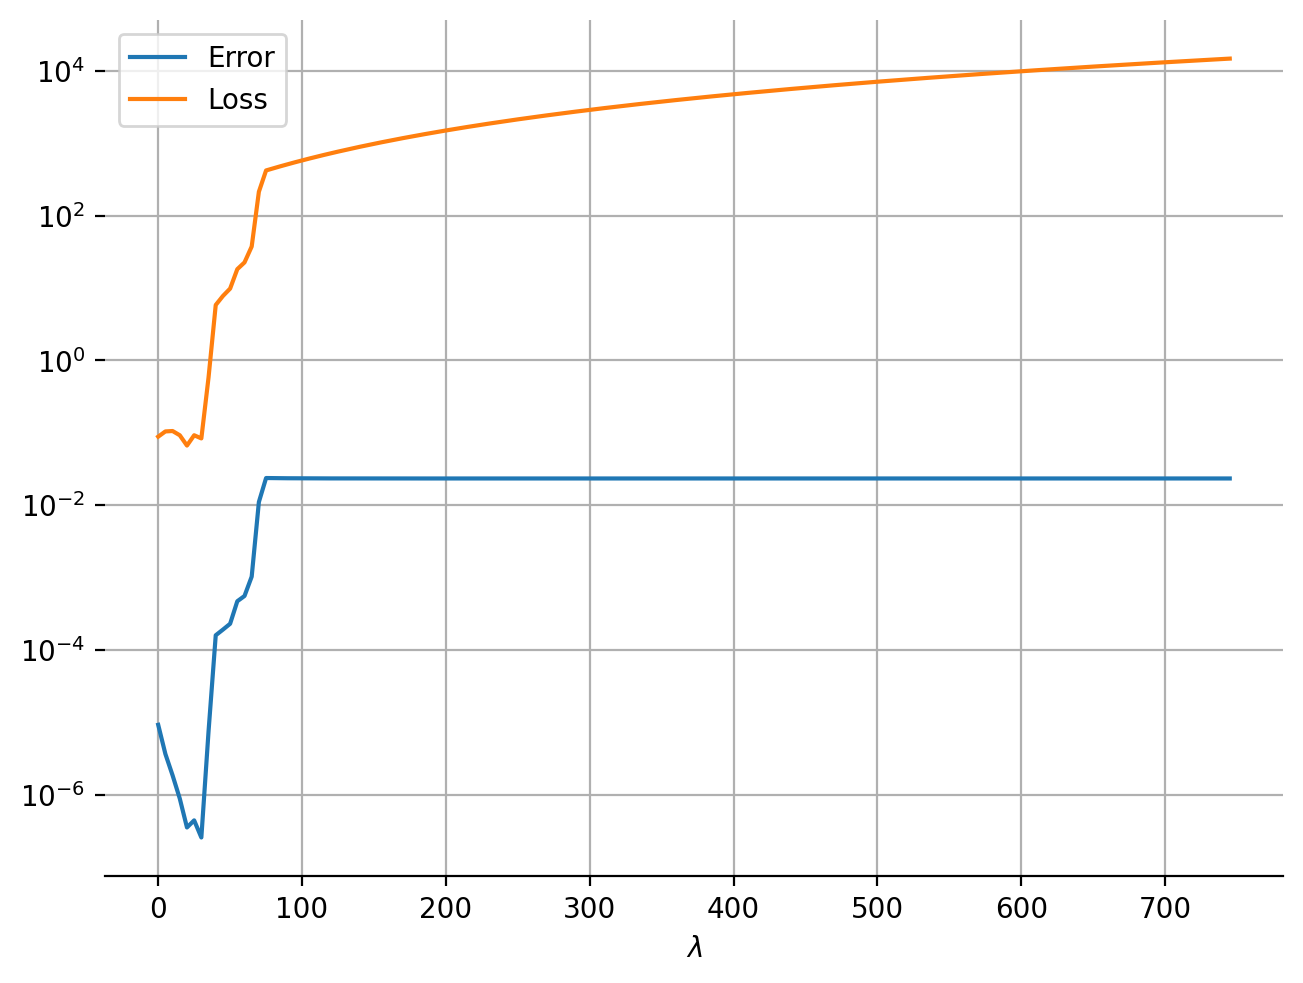

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, DATA71, c="C0", label="Error")
ax.plot(C, DATA72, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

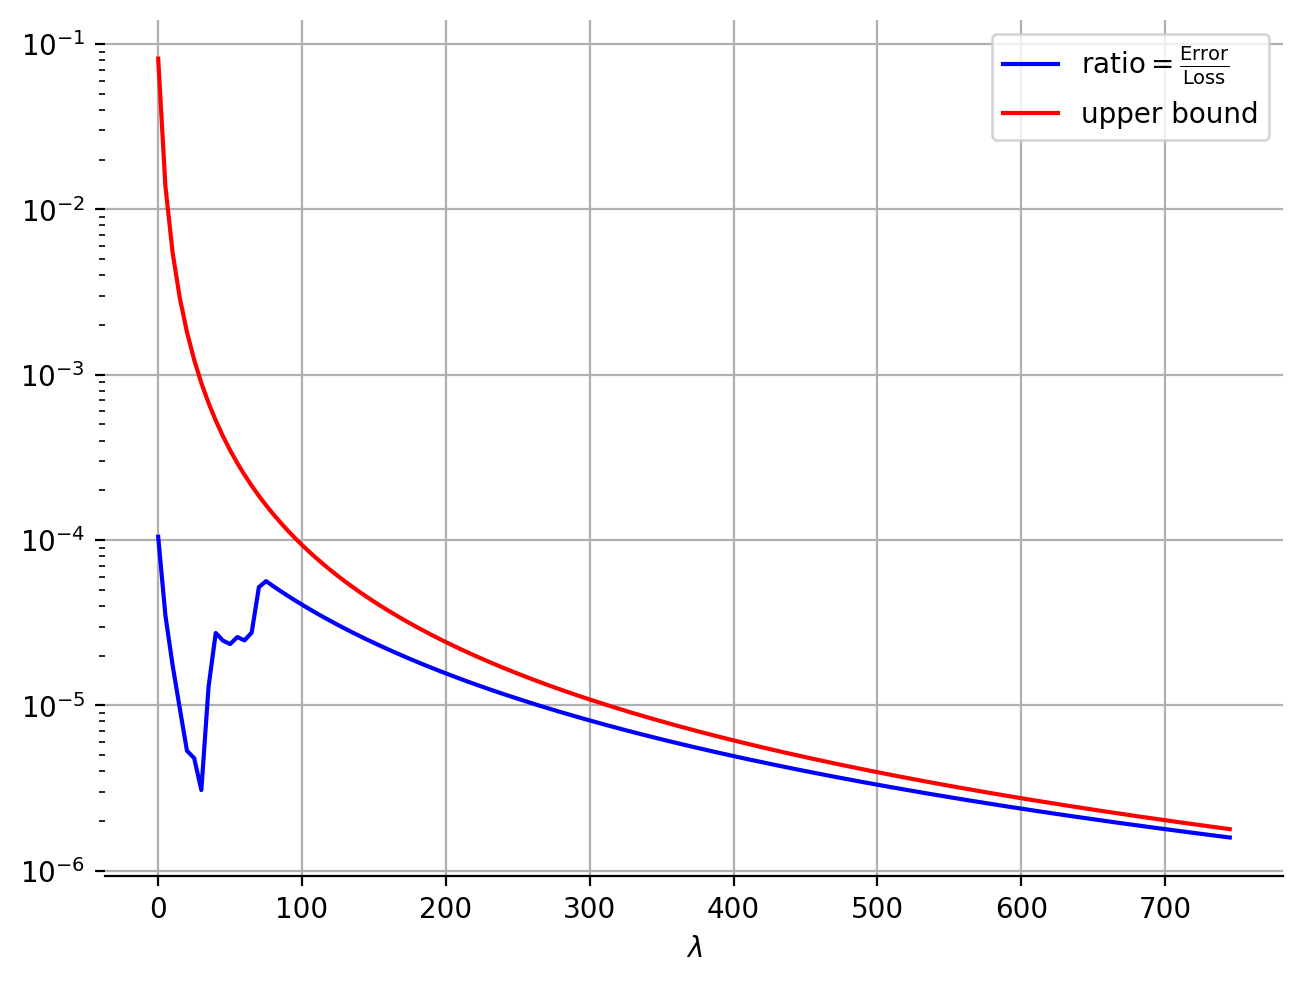

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, RATIO7, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(C, 4/(k+2*C)**2, c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

In [ ]:
eps=1
c=7

In [ ]:
K=np.arange(0,750,5)

In [ ]:
DATA81=[]
DATA82=[]
RATIO8=[]

for k in K:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)-2*t+1
        y_e = torch.sin(np.pi*t)+torch.cos(np.pi*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt+k*t*y_t-c*y+(eps*np.pi**2+np.pi*k*t+c)*torch.sin(np.pi*t)+(eps*np.pi**2-np.pi*k*t+c)*torch.cos(np.pi*t), torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA81.append(realloss.item())
            DATA82.append(loss.item())
            RATIO8.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 202.6375
epoch = 50, loss_de = 0.1914
epoch = 100, loss_de = 0.0619
epoch = 150, loss_de = 0.0628
epoch = 200, loss_de = 0.0569
epoch = 250, loss_de = 0.0595
epoch = 300, loss_de = 0.0621
epoch = 350, loss_de = 0.0605
epoch = 400, loss_de = 0.0587
epoch = 450, loss_de = 0.0611
1.2130041113778134e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 230.3213
epoch = 50, loss_de = 0.1468
epoch = 100, loss_de = 0.0958
epoch = 150, loss_de = 0.0988
epoch = 200, loss_de = 0.0880
epoch = 250, loss_de = 0.0932
epoch = 300, loss_de = 0.0976
epoch = 350, loss_de = 0.0935
epoch = 400, loss_de = 0.0927
epoch = 450, loss_de = 0.0958
2.3887223505880684e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 321.2821
epoch = 50, loss_de = 0.6541
epoch = 100, loss_de = 0.1056
epoch = 150, loss_de = 0.0987
epoch = 200, loss_de = 0.0862
epoch = 250, loss_de = 0.0906
epoch = 300, loss_de = 0.0941
epoch = 350, loss_de = 0.0905
epoch = 400, loss_de = 0.0893
epoch = 450, loss_de = 0.0928
1.5620628346368903e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 475.5199
epoch = 50, loss_de = 1.3564
epoch = 100, loss_de = 0.0502
epoch = 150, loss_de = 0.0442
epoch = 200, loss_de = 0.0382
epoch = 250, loss_de = 0.0406
epoch = 300, loss_de = 0.0422
epoch = 350, loss_de = 0.0413
epoch = 400, loss_de = 0.0394
epoch = 450, loss_de = 0.0415
4.282548502487771e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 693.0347
epoch = 50, loss_de = 33.6339
epoch = 100, loss_de = 12.2674
epoch = 150, loss_de = 9.3665
epoch = 200, loss_de = 8.6592
epoch = 250, loss_de = 8.0496
epoch = 300, loss_de = 8.2939
epoch = 350, loss_de = 7.7884
epoch = 400, loss_de = 8.0820
epoch = 450, loss_de = 8.0199
0.001900467905215919


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 973.8265
epoch = 50, loss_de = 41.2386
epoch = 100, loss_de = 16.2581
epoch = 150, loss_de = 12.6824
epoch = 200, loss_de = 11.8214
epoch = 250, loss_de = 11.0062
epoch = 300, loss_de = 11.3565
epoch = 350, loss_de = 10.6496
epoch = 400, loss_de = 11.0455
epoch = 450, loss_de = 10.9742
0.0022753383964300156


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1317.8953
epoch = 50, loss_de = 55.3226
epoch = 100, loss_de = 21.5548
epoch = 150, loss_de = 16.8601
epoch = 200, loss_de = 15.7557
epoch = 250, loss_de = 14.6499
epoch = 300, loss_de = 15.1249
epoch = 350, loss_de = 14.1650
epoch = 400, loss_de = 14.6762
epoch = 450, loss_de = 14.6042
0.0025968048721551895


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1725.2410
epoch = 50, loss_de = 70.3080
epoch = 100, loss_de = 27.2775
epoch = 150, loss_de = 21.4176
epoch = 200, loss_de = 20.0641
epoch = 250, loss_de = 18.6357
epoch = 300, loss_de = 19.2514
epoch = 350, loss_de = 18.0171
epoch = 400, loss_de = 18.6439
epoch = 450, loss_de = 18.5844
0.002783874049782753


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2195.8635
epoch = 50, loss_de = 87.4481
epoch = 100, loss_de = 34.8845
epoch = 150, loss_de = 27.3620
epoch = 200, loss_de = 25.6525
epoch = 250, loss_de = 23.7941
epoch = 300, loss_de = 24.5834
epoch = 350, loss_de = 23.0025
epoch = 400, loss_de = 23.7686
epoch = 450, loss_de = 23.7305
0.0030010624323040247


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2729.7637
epoch = 50, loss_de = 110.0973
epoch = 100, loss_de = 13.9422
epoch = 150, loss_de = 7.4088
epoch = 200, loss_de = 6.6735
epoch = 250, loss_de = 6.1051
epoch = 300, loss_de = 6.2268
epoch = 350, loss_de = 5.8265
epoch = 400, loss_de = 6.1187
epoch = 450, loss_de = 5.9513
0.0005595659604296088


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3326.9402
epoch = 50, loss_de = 114.1949
epoch = 100, loss_de = 11.9372
epoch = 150, loss_de = 8.3638
epoch = 200, loss_de = 7.6324
epoch = 250, loss_de = 7.0469
epoch = 300, loss_de = 7.1926
epoch = 350, loss_de = 6.7560
epoch = 400, loss_de = 7.0970
epoch = 450, loss_de = 6.9203
0.0005598211428150535


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3987.3936
epoch = 50, loss_de = 88.9508
epoch = 100, loss_de = 12.5241
epoch = 150, loss_de = 4.6996
epoch = 200, loss_de = 3.2437
epoch = 250, loss_de = 2.7534
epoch = 300, loss_de = 2.6430
epoch = 350, loss_de = 2.5535
epoch = 400, loss_de = 2.6017
epoch = 450, loss_de = 2.5544
0.00013687369937542826


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4711.1250
epoch = 50, loss_de = 71.7075
epoch = 100, loss_de = 6.9355
epoch = 150, loss_de = 4.6565
epoch = 200, loss_de = 4.2559
epoch = 250, loss_de = 3.9664
epoch = 300, loss_de = 4.0471
epoch = 350, loss_de = 3.8877
epoch = 400, loss_de = 4.0356
epoch = 450, loss_de = 3.9233
0.0002134556125383824


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5498.1318
epoch = 50, loss_de = 47.6901
epoch = 100, loss_de = 9.2952
epoch = 150, loss_de = 6.4670
epoch = 200, loss_de = 5.7854
epoch = 250, loss_de = 5.2444
epoch = 300, loss_de = 5.3653
epoch = 350, loss_de = 5.0898
epoch = 400, loss_de = 5.3462
epoch = 450, loss_de = 5.2440
0.0002599013678263873


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6348.4165
epoch = 50, loss_de = 37.0820
epoch = 100, loss_de = 5.3509
epoch = 150, loss_de = 4.2883
epoch = 200, loss_de = 4.1520
epoch = 250, loss_de = 3.8457
epoch = 300, loss_de = 3.8914
epoch = 350, loss_de = 3.7407
epoch = 400, loss_de = 3.9225
epoch = 450, loss_de = 3.8377
0.000151698463014327


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7261.9775
epoch = 50, loss_de = 27.6198
epoch = 100, loss_de = 2.5427
epoch = 150, loss_de = 2.1308
epoch = 200, loss_de = 2.0924
epoch = 250, loss_de = 1.9284
epoch = 300, loss_de = 1.9988
epoch = 350, loss_de = 1.9085
epoch = 400, loss_de = 2.0017
epoch = 450, loss_de = 1.9503
5.78966319153551e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8238.8164
epoch = 50, loss_de = 68.3420
epoch = 100, loss_de = 2.5192
epoch = 150, loss_de = 1.5562
epoch = 200, loss_de = 1.4449
epoch = 250, loss_de = 1.3667
epoch = 300, loss_de = 1.3671
epoch = 350, loss_de = 1.3417
epoch = 400, loss_de = 1.3661
epoch = 450, loss_de = 1.3687
1.920143040479161e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9278.9326
epoch = 50, loss_de = 66.6635
epoch = 100, loss_de = 13.2520
epoch = 150, loss_de = 9.9987
epoch = 200, loss_de = 9.3765
epoch = 250, loss_de = 8.5694
epoch = 300, loss_de = 8.6705
epoch = 350, loss_de = 8.3498
epoch = 400, loss_de = 8.7755
epoch = 450, loss_de = 8.4773
0.00026772989076562226


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10382.3262
epoch = 50, loss_de = 91.2016
epoch = 100, loss_de = 16.8481
epoch = 150, loss_de = 12.6021
epoch = 200, loss_de = 11.9461
epoch = 250, loss_de = 11.0262
epoch = 300, loss_de = 11.0133
epoch = 350, loss_de = 10.6428
epoch = 400, loss_de = 11.1388
epoch = 450, loss_de = 10.8035
0.0003092992992606014


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11548.9932
epoch = 50, loss_de = 83.1480
epoch = 100, loss_de = 17.2635
epoch = 150, loss_de = 12.9569
epoch = 200, loss_de = 12.3575
epoch = 250, loss_de = 11.4206
epoch = 300, loss_de = 11.3789
epoch = 350, loss_de = 11.0139
epoch = 400, loss_de = 11.5220
epoch = 450, loss_de = 11.1949
0.0002887086302507669


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12778.9424
epoch = 50, loss_de = 65.6034
epoch = 100, loss_de = 17.8466
epoch = 150, loss_de = 13.1524
epoch = 200, loss_de = 12.3442
epoch = 250, loss_de = 11.2349
epoch = 300, loss_de = 11.3735
epoch = 350, loss_de = 10.8990
epoch = 400, loss_de = 11.4978
epoch = 450, loss_de = 11.0798
0.00026687662466429174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14072.1631
epoch = 50, loss_de = 77.6089
epoch = 100, loss_de = 18.1831
epoch = 150, loss_de = 13.6643
epoch = 200, loss_de = 12.9582
epoch = 250, loss_de = 11.8905
epoch = 300, loss_de = 11.9526
epoch = 350, loss_de = 11.4947
epoch = 400, loss_de = 12.0675
epoch = 450, loss_de = 11.6561
0.0002486466255504638


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15428.6660
epoch = 50, loss_de = 55.5359
epoch = 100, loss_de = 17.6360
epoch = 150, loss_de = 13.8912
epoch = 200, loss_de = 13.3712
epoch = 250, loss_de = 12.4291
epoch = 300, loss_de = 12.4017
epoch = 350, loss_de = 12.0098
epoch = 400, loss_de = 12.5704
epoch = 450, loss_de = 12.2180
0.0002299359766766429


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16848.4395
epoch = 50, loss_de = 100.9355
epoch = 100, loss_de = 13.9454
epoch = 150, loss_de = 10.9876
epoch = 200, loss_de = 10.5316
epoch = 250, loss_de = 9.6744
epoch = 300, loss_de = 9.8178
epoch = 350, loss_de = 9.4764
epoch = 400, loss_de = 9.9809
epoch = 450, loss_de = 9.6130
0.00016209880413953215


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18331.4961
epoch = 50, loss_de = 58.0478
epoch = 100, loss_de = 11.1841
epoch = 150, loss_de = 9.0418
epoch = 200, loss_de = 8.7670
epoch = 250, loss_de = 8.0797
epoch = 300, loss_de = 8.2049
epoch = 350, loss_de = 7.9330
epoch = 400, loss_de = 8.3470
epoch = 450, loss_de = 8.0512
0.00011910233297385275


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19877.8340
epoch = 50, loss_de = 77.7429
epoch = 100, loss_de = 18.8961
epoch = 150, loss_de = 14.7201
epoch = 200, loss_de = 14.1613
epoch = 250, loss_de = 12.9908
epoch = 300, loss_de = 13.1105
epoch = 350, loss_de = 12.6377
epoch = 400, loss_de = 13.2927
epoch = 450, loss_de = 12.8220
0.00019293399236630648


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21487.4375
epoch = 50, loss_de = 100.3007
epoch = 100, loss_de = 11.6964
epoch = 150, loss_de = 9.5744
epoch = 200, loss_de = 9.4525
epoch = 250, loss_de = 8.7016
epoch = 300, loss_de = 8.8429
epoch = 350, loss_de = 8.4936
epoch = 400, loss_de = 8.9738
epoch = 450, loss_de = 8.6977
0.00011833086318802088


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23160.3262
epoch = 50, loss_de = 56.7731
epoch = 100, loss_de = 15.2695
epoch = 150, loss_de = 10.4083
epoch = 200, loss_de = 9.2144
epoch = 250, loss_de = 8.5308
epoch = 300, loss_de = 8.2059
epoch = 350, loss_de = 8.1835
epoch = 400, loss_de = 8.2550
epoch = 450, loss_de = 8.3981
6.227188714547083e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 24896.4824
epoch = 50, loss_de = 143.0783
epoch = 100, loss_de = 44.2016
epoch = 150, loss_de = 35.6057
epoch = 200, loss_de = 33.8155
epoch = 250, loss_de = 31.7671
epoch = 300, loss_de = 32.5168
epoch = 350, loss_de = 30.7894
epoch = 400, loss_de = 31.8249
epoch = 450, loss_de = 31.4328
0.0003950107202399522


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26695.9258
epoch = 50, loss_de = 52.1464
epoch = 100, loss_de = 8.5359
epoch = 150, loss_de = 7.0300
epoch = 200, loss_de = 7.0024
epoch = 250, loss_de = 6.4956
epoch = 300, loss_de = 6.5558
epoch = 350, loss_de = 6.3619
epoch = 400, loss_de = 6.6811
epoch = 450, loss_de = 6.4996
6.0666770878015086e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28558.6367
epoch = 50, loss_de = 88.4117
epoch = 100, loss_de = 36.8720
epoch = 150, loss_de = 29.6375
epoch = 200, loss_de = 28.1718
epoch = 250, loss_de = 26.2769
epoch = 300, loss_de = 27.0895
epoch = 350, loss_de = 25.4097
epoch = 400, loss_de = 26.4606
epoch = 450, loss_de = 26.0595
0.0002763832453638315


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30484.6328
epoch = 50, loss_de = 91.0072
epoch = 100, loss_de = 8.4418
epoch = 150, loss_de = 6.7281
epoch = 200, loss_de = 6.6262
epoch = 250, loss_de = 6.1844
epoch = 300, loss_de = 6.4048
epoch = 350, loss_de = 6.1213
epoch = 400, loss_de = 6.3882
epoch = 450, loss_de = 6.1368
3.864114114549011e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32473.9004
epoch = 50, loss_de = 42.5024
epoch = 100, loss_de = 9.1773
epoch = 150, loss_de = 6.8322
epoch = 200, loss_de = 6.1271
epoch = 250, loss_de = 5.7666
epoch = 300, loss_de = 5.6390
epoch = 350, loss_de = 5.5852
epoch = 400, loss_de = 5.6646
epoch = 450, loss_de = 5.6898
2.7693697120412253e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34526.4531
epoch = 50, loss_de = 46.2068
epoch = 100, loss_de = 5.2592
epoch = 150, loss_de = 4.7884
epoch = 200, loss_de = 4.8792
epoch = 250, loss_de = 4.5605
epoch = 300, loss_de = 4.6235
epoch = 350, loss_de = 4.4779
epoch = 400, loss_de = 4.7036
epoch = 450, loss_de = 4.6047
2.8378753995639272e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36642.2734
epoch = 50, loss_de = 72.4895
epoch = 100, loss_de = 13.6968
epoch = 150, loss_de = 10.0363
epoch = 200, loss_de = 9.4899
epoch = 250, loss_de = 8.9613
epoch = 300, loss_de = 8.6587
epoch = 350, loss_de = 8.6829
epoch = 400, loss_de = 8.9050
epoch = 450, loss_de = 8.8538
4.668770270654932e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 38821.3711
epoch = 50, loss_de = 107.4790
epoch = 100, loss_de = 26.7765
epoch = 150, loss_de = 21.4868
epoch = 200, loss_de = 20.2041
epoch = 250, loss_de = 18.8313
epoch = 300, loss_de = 19.2372
epoch = 350, loss_de = 18.4514
epoch = 400, loss_de = 19.0853
epoch = 450, loss_de = 18.4444
0.00010707056208048016


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41063.7617
epoch = 50, loss_de = 100.3651
epoch = 100, loss_de = 10.7605
epoch = 150, loss_de = 7.7524
epoch = 200, loss_de = 7.3585
epoch = 250, loss_de = 6.8970
epoch = 300, loss_de = 6.7060
epoch = 350, loss_de = 6.7059
epoch = 400, loss_de = 6.9033
epoch = 450, loss_de = 6.8092
3.44343607139308e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43369.4062
epoch = 50, loss_de = 77.5366
epoch = 100, loss_de = 20.8167
epoch = 150, loss_de = 14.4217
epoch = 200, loss_de = 12.7139
epoch = 250, loss_de = 11.7962
epoch = 300, loss_de = 11.4271
epoch = 350, loss_de = 11.3090
epoch = 400, loss_de = 11.4793
epoch = 450, loss_de = 11.5829
4.9009402573574334e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45738.3359
epoch = 50, loss_de = 115.7329
epoch = 100, loss_de = 13.2086
epoch = 150, loss_de = 8.1471
epoch = 200, loss_de = 7.2400
epoch = 250, loss_de = 6.7115
epoch = 300, loss_de = 6.3948
epoch = 350, loss_de = 6.4494
epoch = 400, loss_de = 6.5603
epoch = 450, loss_de = 6.5405
2.7794814741355367e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48170.5586
epoch = 50, loss_de = 108.8736
epoch = 100, loss_de = 8.1601
epoch = 150, loss_de = 6.7408
epoch = 200, loss_de = 6.6941
epoch = 250, loss_de = 6.2197
epoch = 300, loss_de = 6.3074
epoch = 350, loss_de = 6.1227
epoch = 400, loss_de = 6.4283
epoch = 450, loss_de = 6.2333
3.0281025829026476e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50666.0430
epoch = 50, loss_de = 113.0156
epoch = 100, loss_de = 9.8068
epoch = 150, loss_de = 7.4782
epoch = 200, loss_de = 7.2992
epoch = 250, loss_de = 6.7933
epoch = 300, loss_de = 6.7956
epoch = 350, loss_de = 6.6602
epoch = 400, loss_de = 6.9533
epoch = 450, loss_de = 6.7655
3.0354773116414435e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 53224.8008
epoch = 50, loss_de = 137.7055
epoch = 100, loss_de = 23.2938
epoch = 150, loss_de = 14.1711
epoch = 200, loss_de = 12.0862
epoch = 250, loss_de = 11.0847
epoch = 300, loss_de = 10.4967
epoch = 350, loss_de = 10.5254
epoch = 400, loss_de = 10.6269
epoch = 450, loss_de = 10.7580
3.653294697869569e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55846.8281
epoch = 50, loss_de = 126.6984
epoch = 100, loss_de = 21.3514
epoch = 150, loss_de = 18.3919
epoch = 200, loss_de = 18.3111
epoch = 250, loss_de = 16.8338
epoch = 300, loss_de = 17.2868
epoch = 350, loss_de = 16.5063
epoch = 400, loss_de = 17.4506
epoch = 450, loss_de = 16.8241
8.624421752756462e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58532.1680
epoch = 50, loss_de = 297.4831
epoch = 100, loss_de = 108.7563
epoch = 150, loss_de = 83.3103
epoch = 200, loss_de = 78.0081
epoch = 250, loss_de = 72.5674
epoch = 300, loss_de = 74.7312
epoch = 350, loss_de = 70.0615
epoch = 400, loss_de = 72.2260
epoch = 450, loss_de = 71.6188
0.0003871147346217185


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61280.7500
epoch = 50, loss_de = 301.5477
epoch = 100, loss_de = 108.6901
epoch = 150, loss_de = 84.4793
epoch = 200, loss_de = 79.2274
epoch = 250, loss_de = 73.7261
epoch = 300, loss_de = 75.9680
epoch = 350, loss_de = 71.2140
epoch = 400, loss_de = 73.4257
epoch = 450, loss_de = 72.8226
0.00037403966416604817


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64092.6211
epoch = 50, loss_de = 249.2878
epoch = 100, loss_de = 53.1140
epoch = 150, loss_de = 32.6418
epoch = 200, loss_de = 27.7922
epoch = 250, loss_de = 24.1965
epoch = 300, loss_de = 25.2498
epoch = 350, loss_de = 22.8698
epoch = 400, loss_de = 24.0760
epoch = 450, loss_de = 23.6911
0.00011831380106741562


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 66967.7656
epoch = 50, loss_de = 126.7701
epoch = 100, loss_de = 26.5763
epoch = 150, loss_de = 17.6360
epoch = 200, loss_de = 15.5156
epoch = 250, loss_de = 14.4421
epoch = 300, loss_de = 13.7300
epoch = 350, loss_de = 13.7975
epoch = 400, loss_de = 13.9652
epoch = 450, loss_de = 14.1006
3.974721403210424e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 69906.2031
epoch = 50, loss_de = 219.0427
epoch = 100, loss_de = 13.9090
epoch = 150, loss_de = 11.5064
epoch = 200, loss_de = 11.4147
epoch = 250, loss_de = 10.6444
epoch = 300, loss_de = 10.8960
epoch = 350, loss_de = 10.4811
epoch = 400, loss_de = 11.0780
epoch = 450, loss_de = 10.6846
3.830860077869147e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 72907.8984
epoch = 50, loss_de = 66.5219
epoch = 100, loss_de = 2.9763
epoch = 150, loss_de = 2.5984
epoch = 200, loss_de = 2.6930
epoch = 250, loss_de = 2.4588
epoch = 300, loss_de = 2.5964
epoch = 350, loss_de = 2.4489
epoch = 400, loss_de = 2.5926
epoch = 450, loss_de = 2.5201
4.530992555373814e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 75972.8750
epoch = 50, loss_de = 194.0557
epoch = 100, loss_de = 75.0745
epoch = 150, loss_de = 63.4710
epoch = 200, loss_de = 61.1855
epoch = 250, loss_de = 57.3476
epoch = 300, loss_de = 59.2499
epoch = 350, loss_de = 55.7486
epoch = 400, loss_de = 57.8514
epoch = 450, loss_de = 57.0626
0.00021362677216529846


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79101.1484
epoch = 50, loss_de = 115.4293
epoch = 100, loss_de = 15.0747
epoch = 150, loss_de = 12.3863
epoch = 200, loss_de = 11.5730
epoch = 250, loss_de = 10.8413
epoch = 300, loss_de = 10.9009
epoch = 350, loss_de = 10.6156
epoch = 400, loss_de = 10.9088
epoch = 450, loss_de = 10.7335
2.1117950382176787e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82292.6719
epoch = 50, loss_de = 183.5025
epoch = 100, loss_de = 51.0903
epoch = 150, loss_de = 38.6767
epoch = 200, loss_de = 35.1879
epoch = 250, loss_de = 32.7112
epoch = 300, loss_de = 32.8871
epoch = 350, loss_de = 31.7971
epoch = 400, loss_de = 32.6423
epoch = 450, loss_de = 32.0987
8.139249257510528e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 85547.4766
epoch = 50, loss_de = 178.8340
epoch = 100, loss_de = 55.7546
epoch = 150, loss_de = 45.4302
epoch = 200, loss_de = 42.9024
epoch = 250, loss_de = 39.6849
epoch = 300, loss_de = 40.6639
epoch = 350, loss_de = 38.8200
epoch = 400, loss_de = 40.5812
epoch = 450, loss_de = 38.9382
0.00011183284368598834


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88865.5625
epoch = 50, loss_de = 447.4619
epoch = 100, loss_de = 148.2269
epoch = 150, loss_de = 113.1303
epoch = 200, loss_de = 105.6282
epoch = 250, loss_de = 98.1098
epoch = 300, loss_de = 101.0001
epoch = 350, loss_de = 94.6290
epoch = 400, loss_de = 97.5286
epoch = 450, loss_de = 96.7256
0.00033430010080337524


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 92246.9375
epoch = 50, loss_de = 426.7895
epoch = 100, loss_de = 139.6350
epoch = 150, loss_de = 108.6361
epoch = 200, loss_de = 102.0650
epoch = 250, loss_de = 94.7209
epoch = 300, loss_de = 97.6175
epoch = 350, loss_de = 91.2169
epoch = 400, loss_de = 94.7517
epoch = 450, loss_de = 93.4546
0.0003072802792303264


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95691.5703
epoch = 50, loss_de = 373.2920
epoch = 100, loss_de = 41.6983
epoch = 150, loss_de = 34.7680
epoch = 200, loss_de = 33.6463
epoch = 250, loss_de = 31.2937
epoch = 300, loss_de = 32.3574
epoch = 350, loss_de = 30.8116
epoch = 400, loss_de = 32.1003
epoch = 450, loss_de = 30.7407
7.035610906314105e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 99199.4844
epoch = 50, loss_de = 254.6889
epoch = 100, loss_de = 40.3203
epoch = 150, loss_de = 28.2261
epoch = 200, loss_de = 25.2157
epoch = 250, loss_de = 23.9095
epoch = 300, loss_de = 22.8776
epoch = 350, loss_de = 23.0213
epoch = 400, loss_de = 23.2287
epoch = 450, loss_de = 23.3982
3.890964944730513e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102770.6719
epoch = 50, loss_de = 218.6641
epoch = 100, loss_de = 29.1825
epoch = 150, loss_de = 25.4224
epoch = 200, loss_de = 25.4471
epoch = 250, loss_de = 23.9506
epoch = 300, loss_de = 24.0139
epoch = 350, loss_de = 23.3794
epoch = 400, loss_de = 24.4010
epoch = 450, loss_de = 23.8275
5.1908766181441024e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106405.1641
epoch = 50, loss_de = 171.5898
epoch = 100, loss_de = 56.4870
epoch = 150, loss_de = 41.7869
epoch = 200, loss_de = 37.4372
epoch = 250, loss_de = 35.4743
epoch = 300, loss_de = 34.9114
epoch = 350, loss_de = 34.5146
epoch = 400, loss_de = 34.6779
epoch = 450, loss_de = 34.6824
5.539413177757524e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 110102.8984
epoch = 50, loss_de = 459.3647
epoch = 100, loss_de = 175.8947
epoch = 150, loss_de = 141.8361
epoch = 200, loss_de = 133.8859
epoch = 250, loss_de = 125.2147
epoch = 300, loss_de = 127.9550
epoch = 350, loss_de = 120.8390
epoch = 400, loss_de = 125.2305
epoch = 450, loss_de = 123.2770
0.0003312140761408955


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 113863.9375
epoch = 50, loss_de = 178.9812
epoch = 100, loss_de = 31.3361
epoch = 150, loss_de = 26.9753
epoch = 200, loss_de = 26.9563
epoch = 250, loss_de = 25.2419
epoch = 300, loss_de = 25.6076
epoch = 350, loss_de = 24.7366
epoch = 400, loss_de = 25.9186
epoch = 450, loss_de = 25.3722
5.501818668562919e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 117688.2188
epoch = 50, loss_de = 217.0592
epoch = 100, loss_de = 52.4271
epoch = 150, loss_de = 43.6321
epoch = 200, loss_de = 43.1811
epoch = 250, loss_de = 40.2765
epoch = 300, loss_de = 40.5124
epoch = 350, loss_de = 39.2243
epoch = 400, loss_de = 41.1200
epoch = 450, loss_de = 40.1004
9.291604510508478e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 121575.8203
epoch = 50, loss_de = 288.6612
epoch = 100, loss_de = 60.8110
epoch = 150, loss_de = 51.0826
epoch = 200, loss_de = 50.3629
epoch = 250, loss_de = 47.2465
epoch = 300, loss_de = 47.5586
epoch = 350, loss_de = 46.0311
epoch = 400, loss_de = 48.1448
epoch = 450, loss_de = 46.8925
0.00010485771053936332


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 125526.6719
epoch = 50, loss_de = 383.0536
epoch = 100, loss_de = 69.1370
epoch = 150, loss_de = 58.3305
epoch = 200, loss_de = 57.7709
epoch = 250, loss_de = 53.8856
epoch = 300, loss_de = 54.5733
epoch = 350, loss_de = 52.3945
epoch = 400, loss_de = 54.9032
epoch = 450, loss_de = 53.0372
0.00011504647409310564


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 129540.7969
epoch = 50, loss_de = 112.0698
epoch = 100, loss_de = 11.0038
epoch = 150, loss_de = 9.9759
epoch = 200, loss_de = 10.3347
epoch = 250, loss_de = 9.4739
epoch = 300, loss_de = 9.8951
epoch = 350, loss_de = 9.3298
epoch = 400, loss_de = 9.9264
epoch = 450, loss_de = 9.6469
1.426725066266954e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 133618.2344
epoch = 50, loss_de = 141.7611
epoch = 100, loss_de = 9.9711
epoch = 150, loss_de = 8.7678
epoch = 200, loss_de = 9.0072
epoch = 250, loss_de = 8.0462
epoch = 300, loss_de = 8.6238
epoch = 350, loss_de = 7.9237
epoch = 400, loss_de = 8.5186
epoch = 450, loss_de = 8.2374
1.0684241715352982e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 137758.9062
epoch = 50, loss_de = 493.6461
epoch = 100, loss_de = 190.4337
epoch = 150, loss_de = 154.4098
epoch = 200, loss_de = 146.8079
epoch = 250, loss_de = 137.2891
epoch = 300, loss_de = 141.2793
epoch = 350, loss_de = 132.7464
epoch = 400, loss_de = 137.5648
epoch = 450, loss_de = 135.7302
0.0002897015947382897


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 141962.9062
epoch = 50, loss_de = 431.6749
epoch = 100, loss_de = 23.6102
epoch = 150, loss_de = 15.5755
epoch = 200, loss_de = 14.2233
epoch = 250, loss_de = 13.6797
epoch = 300, loss_de = 13.4361
epoch = 350, loss_de = 13.4626
epoch = 400, loss_de = 13.6905
epoch = 450, loss_de = 13.5166
1.830722248996608e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 146230.0938
epoch = 50, loss_de = 558.0490
epoch = 100, loss_de = 196.5139
epoch = 150, loss_de = 158.6633
epoch = 200, loss_de = 150.8722
epoch = 250, loss_de = 140.9964
epoch = 300, loss_de = 145.2586
epoch = 350, loss_de = 136.4295
epoch = 400, loss_de = 141.1405
epoch = 450, loss_de = 139.4771
0.00027987462817691267


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 150560.6406
epoch = 50, loss_de = 566.8901
epoch = 100, loss_de = 212.8971
epoch = 150, loss_de = 170.2440
epoch = 200, loss_de = 161.3826
epoch = 250, loss_de = 150.6896
epoch = 300, loss_de = 155.1952
epoch = 350, loss_de = 145.7081
epoch = 400, loss_de = 150.6378
epoch = 450, loss_de = 148.9350
0.00029253255343064666


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 154954.4062
epoch = 50, loss_de = 718.9845
epoch = 100, loss_de = 233.4651
epoch = 150, loss_de = 185.1769
epoch = 200, loss_de = 174.8596
epoch = 250, loss_de = 163.1374
epoch = 300, loss_de = 167.9189
epoch = 350, loss_de = 157.6057
epoch = 400, loss_de = 162.8258
epoch = 450, loss_de = 161.0642
0.0003101664187852293


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 159411.4844
epoch = 50, loss_de = 679.9736
epoch = 100, loss_de = 254.6119
epoch = 150, loss_de = 198.9163
epoch = 200, loss_de = 187.2627
epoch = 250, loss_de = 174.5679
epoch = 300, loss_de = 179.6309
epoch = 350, loss_de = 168.5320
epoch = 400, loss_de = 174.0090
epoch = 450, loss_de = 172.2111
0.0003247056738473475


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 163931.8594
epoch = 50, loss_de = 831.1439
epoch = 100, loss_de = 274.2563
epoch = 150, loss_de = 213.4125
epoch = 200, loss_de = 200.3205
epoch = 250, loss_de = 186.5850
epoch = 300, loss_de = 191.9596
epoch = 350, loss_de = 180.0262
epoch = 400, loss_de = 185.7352
epoch = 450, loss_de = 183.9232
0.00033956702100113034


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 168515.4531
epoch = 50, loss_de = 975.6105
epoch = 100, loss_de = 297.6335
epoch = 150, loss_de = 229.3594
epoch = 200, loss_de = 214.7247
epoch = 250, loss_de = 199.8807
epoch = 300, loss_de = 205.5822
epoch = 350, loss_de = 192.7794
epoch = 400, loss_de = 198.6932
epoch = 450, loss_de = 196.8769
0.0003553298010956496


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 173162.3906
epoch = 50, loss_de = 1020.7574
epoch = 100, loss_de = 323.8276
epoch = 150, loss_de = 247.3373
epoch = 200, loss_de = 231.0009
epoch = 250, loss_de = 214.9715
epoch = 300, loss_de = 220.9941
epoch = 350, loss_de = 207.2668
epoch = 400, loss_de = 213.4146
epoch = 450, loss_de = 211.5775
0.0003728118317667395


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 177872.5938
epoch = 50, loss_de = 1035.8641
epoch = 100, loss_de = 354.0198
epoch = 150, loss_de = 268.0130
epoch = 200, loss_de = 249.5352
epoch = 250, loss_de = 232.1792
epoch = 300, loss_de = 238.5137
epoch = 350, loss_de = 223.7489
epoch = 400, loss_de = 230.1909
epoch = 450, loss_de = 228.3135
0.00039381510578095913


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 182645.9844
epoch = 50, loss_de = 360.0587
epoch = 100, loss_de = 94.5560
epoch = 150, loss_de = 77.9245
epoch = 200, loss_de = 76.6539
epoch = 250, loss_de = 71.3953
epoch = 300, loss_de = 71.7936
epoch = 350, loss_de = 69.4847
epoch = 400, loss_de = 72.7872
epoch = 450, loss_de = 70.9793
0.00010759090218925849


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 187482.7500
epoch = 50, loss_de = 984.6517
epoch = 100, loss_de = 50.6313
epoch = 150, loss_de = 35.1385
epoch = 200, loss_de = 33.3692
epoch = 250, loss_de = 31.8402
epoch = 300, loss_de = 31.5025
epoch = 350, loss_de = 31.2168
epoch = 400, loss_de = 32.2434
epoch = 450, loss_de = 31.8503
3.793533323914744e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 192382.7812
epoch = 50, loss_de = 1151.1587
epoch = 100, loss_de = 426.1714
epoch = 150, loss_de = 319.9158
epoch = 200, loss_de = 296.2569
epoch = 250, loss_de = 275.4399
epoch = 300, loss_de = 282.6925
epoch = 350, loss_de = 265.2360
epoch = 400, loss_de = 272.3593
epoch = 450, loss_de = 270.3449
0.00043528052628971636


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 197346.0469
epoch = 50, loss_de = 1081.4338
epoch = 100, loss_de = 412.2620
epoch = 150, loss_de = 310.2605
epoch = 200, loss_de = 288.0322
epoch = 250, loss_de = 267.8470
epoch = 300, loss_de = 274.9287
epoch = 350, loss_de = 258.0436
epoch = 400, loss_de = 265.1165
epoch = 450, loss_de = 262.9966
0.00040917625301517546


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 202372.6406
epoch = 50, loss_de = 731.4895
epoch = 100, loss_de = 72.3920
epoch = 150, loss_de = 61.8611
epoch = 200, loss_de = 60.8788
epoch = 250, loss_de = 57.4035
epoch = 300, loss_de = 58.4690
epoch = 350, loss_de = 56.3845
epoch = 400, loss_de = 58.8586
epoch = 450, loss_de = 57.2684
7.487503171432763e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 207462.4375
epoch = 50, loss_de = 1491.2324
epoch = 100, loss_de = 467.4551
epoch = 150, loss_de = 352.3154
epoch = 200, loss_de = 325.8196
epoch = 250, loss_de = 302.6984
epoch = 300, loss_de = 309.1860
epoch = 350, loss_de = 290.6342
epoch = 400, loss_de = 299.7791
epoch = 450, loss_de = 296.6907
0.00044107192661613226


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 212615.5938
epoch = 50, loss_de = 875.4734
epoch = 100, loss_de = 367.6222
epoch = 150, loss_de = 291.7721
epoch = 200, loss_de = 274.9777
epoch = 250, loss_de = 256.6110
epoch = 300, loss_de = 262.7479
epoch = 350, loss_de = 247.3153
epoch = 400, loss_de = 256.5749
epoch = 450, loss_de = 252.4200
0.0003485379565972835


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 217832.0156
epoch = 50, loss_de = 711.7474
epoch = 100, loss_de = 150.5305
epoch = 150, loss_de = 123.7140
epoch = 200, loss_de = 121.1667
epoch = 250, loss_de = 111.2222
epoch = 300, loss_de = 113.3228
epoch = 350, loss_de = 108.9070
epoch = 400, loss_de = 114.8239
epoch = 450, loss_de = 110.1245
0.0001425504742655903


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 223111.6094
epoch = 50, loss_de = 435.0569
epoch = 100, loss_de = 69.3550
epoch = 150, loss_de = 53.4756
epoch = 200, loss_de = 52.7605
epoch = 250, loss_de = 48.9446
epoch = 300, loss_de = 49.0489
epoch = 350, loss_de = 47.9465
epoch = 400, loss_de = 50.1478
epoch = 450, loss_de = 48.5285
5.201373278396204e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 228454.6094
epoch = 50, loss_de = 1864.0624
epoch = 100, loss_de = 657.2191
epoch = 150, loss_de = 476.4922
epoch = 200, loss_de = 437.0249
epoch = 250, loss_de = 406.4695
epoch = 300, loss_de = 414.1804
epoch = 350, loss_de = 390.3294
epoch = 400, loss_de = 399.9972
epoch = 450, loss_de = 397.1137
0.0005462666158564389


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 233860.8594
epoch = 50, loss_de = 1356.3534
epoch = 100, loss_de = 547.2991
epoch = 150, loss_de = 427.3239
epoch = 200, loss_de = 398.7781
epoch = 250, loss_de = 373.1142
epoch = 300, loss_de = 379.4503
epoch = 350, loss_de = 359.3064
epoch = 400, loss_de = 370.8167
epoch = 450, loss_de = 365.7860
0.0004706868203356862


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 239330.3281
epoch = 50, loss_de = 963.0392
epoch = 100, loss_de = 400.4761
epoch = 150, loss_de = 324.5009
epoch = 200, loss_de = 307.9076
epoch = 250, loss_de = 289.0662
epoch = 300, loss_de = 295.5247
epoch = 350, loss_de = 279.5938
epoch = 400, loss_de = 288.8513
epoch = 450, loss_de = 284.9527
0.00034912346745841205


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 244863.1094
epoch = 50, loss_de = 851.6651
epoch = 100, loss_de = 319.9803
epoch = 150, loss_de = 265.2549
epoch = 200, loss_de = 254.5074
epoch = 250, loss_de = 239.3398
epoch = 300, loss_de = 245.7662
epoch = 350, loss_de = 232.3019
epoch = 400, loss_de = 240.0060
epoch = 450, loss_de = 236.9358
0.00027673650765791535


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 250459.2188
epoch = 50, loss_de = 808.3741
epoch = 100, loss_de = 277.2386
epoch = 150, loss_de = 234.5714
epoch = 200, loss_de = 226.0840
epoch = 250, loss_de = 212.8320
epoch = 300, loss_de = 219.1363
epoch = 350, loss_de = 207.0477
epoch = 400, loss_de = 213.9243
epoch = 450, loss_de = 211.2659
0.00023589325428474694


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 256118.5312
epoch = 50, loss_de = 796.5099
epoch = 100, loss_de = 285.6209
epoch = 150, loss_de = 240.7083
epoch = 200, loss_de = 231.9944
epoch = 250, loss_de = 218.3753
epoch = 300, loss_de = 225.0170
epoch = 350, loss_de = 212.5616
epoch = 400, loss_de = 219.3027
epoch = 450, loss_de = 216.8336
0.0002335746248718351


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 261841.1562
epoch = 50, loss_de = 1163.1742
epoch = 100, loss_de = 56.2757
epoch = 150, loss_de = 41.2212
epoch = 200, loss_de = 40.9021
epoch = 250, loss_de = 38.2163
epoch = 300, loss_de = 38.5993
epoch = 350, loss_de = 37.7154
epoch = 400, loss_de = 39.4464
epoch = 450, loss_de = 38.0987
3.302343611721881e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 267626.9688
epoch = 50, loss_de = 842.9054
epoch = 100, loss_de = 344.1667
epoch = 150, loss_de = 286.6511
epoch = 200, loss_de = 274.5083
epoch = 250, loss_de = 257.9994
epoch = 300, loss_de = 265.2888
epoch = 350, loss_de = 250.3833
epoch = 400, loss_de = 258.6149
epoch = 450, loss_de = 255.4919
0.0002733925939537585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 273476.1875
epoch = 50, loss_de = 641.4386
epoch = 100, loss_de = 87.6473
epoch = 150, loss_de = 76.5680
epoch = 200, loss_de = 75.9444
epoch = 250, loss_de = 70.2023
epoch = 300, loss_de = 71.8649
epoch = 350, loss_de = 69.0472
epoch = 400, loss_de = 73.0819
epoch = 450, loss_de = 70.1843
6.434141687350348e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 279388.6562
epoch = 50, loss_de = 938.8526
epoch = 100, loss_de = 39.5969
epoch = 150, loss_de = 30.0793
epoch = 200, loss_de = 28.3906
epoch = 250, loss_de = 26.5796
epoch = 300, loss_de = 26.5232
epoch = 350, loss_de = 25.9241
epoch = 400, loss_de = 26.8511
epoch = 450, loss_de = 26.5224
1.63399672601372e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 285364.3125
epoch = 50, loss_de = 505.7755
epoch = 100, loss_de = 93.6299
epoch = 150, loss_de = 65.2244
epoch = 200, loss_de = 58.1745
epoch = 250, loss_de = 53.6573
epoch = 300, loss_de = 51.8390
epoch = 350, loss_de = 51.5132
epoch = 400, loss_de = 52.3442
epoch = 450, loss_de = 52.7740
3.344336073496379e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 291403.3438
epoch = 50, loss_de = 651.2084
epoch = 100, loss_de = 183.5366
epoch = 150, loss_de = 139.6355
epoch = 200, loss_de = 128.4655
epoch = 250, loss_de = 117.9508
epoch = 300, loss_de = 118.9190
epoch = 350, loss_de = 114.5460
epoch = 400, loss_de = 118.9849
epoch = 450, loss_de = 116.0795
9.081665484700352e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 297505.6250
epoch = 50, loss_de = 876.6952
epoch = 100, loss_de = 393.0380
epoch = 150, loss_de = 324.1213
epoch = 200, loss_de = 309.7865
epoch = 250, loss_de = 291.2997
epoch = 300, loss_de = 300.5198
epoch = 350, loss_de = 283.5889
epoch = 400, loss_de = 291.4962
epoch = 450, loss_de = 289.2285
0.0002043451531790197


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 303671.1562
epoch = 50, loss_de = 449.3432
epoch = 100, loss_de = 148.3308
epoch = 150, loss_de = 124.1166
epoch = 200, loss_de = 118.6178
epoch = 250, loss_de = 109.5417
epoch = 300, loss_de = 112.4178
epoch = 350, loss_de = 107.4111
epoch = 400, loss_de = 112.4734
epoch = 450, loss_de = 108.1102
8.361511572729796e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 309899.9688
epoch = 50, loss_de = 536.6434
epoch = 100, loss_de = 176.1232
epoch = 150, loss_de = 137.6666
epoch = 200, loss_de = 128.0390
epoch = 250, loss_de = 118.1795
epoch = 300, loss_de = 119.6174
epoch = 350, loss_de = 115.1395
epoch = 400, loss_de = 119.5235
epoch = 450, loss_de = 116.5280
8.389986760448664e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 316192.1562
epoch = 50, loss_de = 664.3927
epoch = 100, loss_de = 152.4957
epoch = 150, loss_de = 122.0178
epoch = 200, loss_de = 114.1400
epoch = 250, loss_de = 105.7510
epoch = 300, loss_de = 107.2993
epoch = 350, loss_de = 103.2362
epoch = 400, loss_de = 107.0618
epoch = 450, loss_de = 104.3868
7.064810051815584e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 322547.4688
epoch = 50, loss_de = 524.3956
epoch = 100, loss_de = 161.0760
epoch = 150, loss_de = 132.9702
epoch = 200, loss_de = 126.3764
epoch = 250, loss_de = 116.8338
epoch = 300, loss_de = 120.2149
epoch = 350, loss_de = 114.5550
epoch = 400, loss_de = 119.5090
epoch = 450, loss_de = 114.5127
8.331961726071313e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 328966.1562
epoch = 50, loss_de = 188.5907
epoch = 100, loss_de = 40.2448
epoch = 150, loss_de = 29.0285
epoch = 200, loss_de = 26.8468
epoch = 250, loss_de = 25.4300
epoch = 300, loss_de = 24.1579
epoch = 350, loss_de = 24.6042
epoch = 400, loss_de = 24.8736
epoch = 450, loss_de = 25.1014
1.2634179256565403e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 335448.0312
epoch = 50, loss_de = 938.3184
epoch = 100, loss_de = 361.9656
epoch = 150, loss_de = 303.2873
epoch = 200, loss_de = 292.1328
epoch = 250, loss_de = 273.8932
epoch = 300, loss_de = 282.7463
epoch = 350, loss_de = 265.9718
epoch = 400, loss_de = 275.3593
epoch = 450, loss_de = 271.9145
0.0002248381351819262


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 341993.2812
epoch = 50, loss_de = 836.2452
epoch = 100, loss_de = 331.1094
epoch = 150, loss_de = 279.8621
epoch = 200, loss_de = 270.0846
epoch = 250, loss_de = 253.1702
epoch = 300, loss_de = 261.7919
epoch = 350, loss_de = 245.9634
epoch = 400, loss_de = 255.0252
epoch = 450, loss_de = 251.6542
0.0001999991509364918


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 348601.8438
epoch = 50, loss_de = 822.3657
epoch = 100, loss_de = 337.2764
epoch = 150, loss_de = 284.5691
epoch = 200, loss_de = 274.3080
epoch = 250, loss_de = 256.9266
epoch = 300, loss_de = 265.7361
epoch = 350, loss_de = 249.5023
epoch = 400, loss_de = 258.8159
epoch = 450, loss_de = 255.3165
0.00019900086044799536


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 355273.5312
epoch = 50, loss_de = 895.9783
epoch = 100, loss_de = 350.7659
epoch = 150, loss_de = 294.8576
epoch = 200, loss_de = 283.8369
epoch = 250, loss_de = 265.7171
epoch = 300, loss_de = 274.7975
epoch = 350, loss_de = 257.9194
epoch = 400, loss_de = 267.5816
epoch = 450, loss_de = 263.9431
0.00020245449559297413


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 362008.6250
epoch = 50, loss_de = 886.8921
epoch = 100, loss_de = 362.7598
epoch = 150, loss_de = 304.6434
epoch = 200, loss_de = 293.0179
epoch = 250, loss_de = 274.2639
epoch = 300, loss_de = 283.5984
epoch = 350, loss_de = 266.1550
epoch = 400, loss_de = 276.1011
epoch = 450, loss_de = 272.3708
0.00020545441657304764


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 368806.9375
epoch = 50, loss_de = 939.9097
epoch = 100, loss_de = 387.2262
epoch = 150, loss_de = 325.2213
epoch = 200, loss_de = 312.3500
epoch = 250, loss_de = 292.5399
epoch = 300, loss_de = 302.2062
epoch = 350, loss_de = 283.8356
epoch = 400, loss_de = 294.2797
epoch = 450, loss_de = 290.3719
0.00021624035434797406


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 375668.4688
epoch = 50, loss_de = 575.6097
epoch = 100, loss_de = 215.3285
epoch = 150, loss_de = 172.5303
epoch = 200, loss_de = 162.0488
epoch = 250, loss_de = 150.5212
epoch = 300, loss_de = 154.1247
epoch = 350, loss_de = 147.6652
epoch = 400, loss_de = 152.1610
epoch = 450, loss_de = 146.1885
8.49169518915005e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 382593.3750
epoch = 50, loss_de = 850.1390
epoch = 100, loss_de = 265.8385
epoch = 150, loss_de = 214.3435
epoch = 200, loss_de = 202.6609
epoch = 250, loss_de = 188.1340
epoch = 300, loss_de = 192.7748
epoch = 350, loss_de = 184.3394
epoch = 400, loss_de = 190.2978
epoch = 450, loss_de = 182.2950
0.00011116574751213193


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 389581.5000
epoch = 50, loss_de = 737.6287
epoch = 100, loss_de = 209.4736
epoch = 150, loss_de = 160.0906
epoch = 200, loss_de = 147.1091
epoch = 250, loss_de = 137.2452
epoch = 300, loss_de = 138.9459
epoch = 350, loss_de = 134.2209
epoch = 400, loss_de = 137.2210
epoch = 450, loss_de = 133.7746
6.807168392697349e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 396632.9688
epoch = 50, loss_de = 565.1840
epoch = 100, loss_de = 193.1136
epoch = 150, loss_de = 144.0883
epoch = 200, loss_de = 129.9854
epoch = 250, loss_de = 121.7488
epoch = 300, loss_de = 121.2630
epoch = 350, loss_de = 118.3762
epoch = 400, loss_de = 120.1741
epoch = 450, loss_de = 118.8901
5.5288433941314e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 403747.6875
epoch = 50, loss_de = 773.4454
epoch = 100, loss_de = 245.5956
epoch = 150, loss_de = 186.8645
epoch = 200, loss_de = 170.5134
epoch = 250, loss_de = 159.3473
epoch = 300, loss_de = 160.5854
epoch = 350, loss_de = 155.4485
epoch = 400, loss_de = 158.4718
epoch = 450, loss_de = 155.3632
7.728331547696143e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 410925.6250
epoch = 50, loss_de = 764.3655
epoch = 100, loss_de = 317.9697
epoch = 150, loss_de = 244.0615
epoch = 200, loss_de = 225.3743
epoch = 250, loss_de = 209.9105
epoch = 300, loss_de = 213.7287
epoch = 350, loss_de = 205.2930
epoch = 400, loss_de = 210.4091
epoch = 450, loss_de = 203.6965
0.00011055321374442428


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 418166.9375
epoch = 50, loss_de = 1259.5826
epoch = 100, loss_de = 364.4126
epoch = 150, loss_de = 276.7725
epoch = 200, loss_de = 253.8129
epoch = 250, loss_de = 236.4544
epoch = 300, loss_de = 240.0881
epoch = 350, loss_de = 231.0443
epoch = 400, loss_de = 236.2761
epoch = 450, loss_de = 228.7851
0.00012372893979772925


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 425471.5000
epoch = 50, loss_de = 1622.9604
epoch = 100, loss_de = 363.7165
epoch = 150, loss_de = 285.3497
epoch = 200, loss_de = 267.0190
epoch = 250, loss_de = 248.3922
epoch = 300, loss_de = 254.0299
epoch = 350, loss_de = 243.2211
epoch = 400, loss_de = 250.2699
epoch = 450, loss_de = 240.3145
0.0001345891650998965


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 432839.2188
epoch = 50, loss_de = 2073.5085
epoch = 100, loss_de = 279.9850
epoch = 150, loss_de = 230.5257
epoch = 200, loss_de = 221.6748
epoch = 250, loss_de = 206.4106
epoch = 300, loss_de = 212.2729
epoch = 350, loss_de = 202.5932
epoch = 400, loss_de = 209.8826
epoch = 450, loss_de = 200.7986
0.00011105697194579989


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 440270.3438
epoch = 50, loss_de = 1115.3250
epoch = 100, loss_de = 345.8325
epoch = 150, loss_de = 252.9573
epoch = 200, loss_de = 227.8353
epoch = 250, loss_de = 212.0650
epoch = 300, loss_de = 213.2527
epoch = 350, loss_de = 206.2726
epoch = 400, loss_de = 210.1891
epoch = 450, loss_de = 205.6427
9.72877605818212e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 447764.7500
epoch = 50, loss_de = 2106.3840
epoch = 100, loss_de = 764.4543
epoch = 150, loss_de = 596.0802
epoch = 200, loss_de = 560.5477
epoch = 250, loss_de = 522.3983
epoch = 300, loss_de = 536.9224
epoch = 350, loss_de = 504.2520
epoch = 400, loss_de = 519.5696
epoch = 450, loss_de = 514.9600
0.00033803380210883915


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 455322.3750
epoch = 50, loss_de = 2095.6597
epoch = 100, loss_de = 823.7127
epoch = 150, loss_de = 635.1600
epoch = 200, loss_de = 595.3037
epoch = 250, loss_de = 554.1426
epoch = 300, loss_de = 569.6592
epoch = 350, loss_de = 534.5465
epoch = 400, loss_de = 550.2451
epoch = 450, loss_de = 545.9003
0.0003560875775292516


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 462943.2812
epoch = 50, loss_de = 2442.9526
epoch = 100, loss_de = 780.3432
epoch = 150, loss_de = 605.6924
epoch = 200, loss_de = 567.6940
epoch = 250, loss_de = 528.7318
epoch = 300, loss_de = 544.3502
epoch = 350, loss_de = 510.7232
epoch = 400, loss_de = 525.1274
epoch = 450, loss_de = 521.1761
0.0003324044228065759


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 470627.4375
epoch = 50, loss_de = 1050.1705
epoch = 100, loss_de = 113.1459
epoch = 150, loss_de = 97.5703
epoch = 200, loss_de = 98.4559
epoch = 250, loss_de = 91.3272
epoch = 300, loss_de = 92.4526
epoch = 350, loss_de = 89.5938
epoch = 400, loss_de = 93.8031
epoch = 450, loss_de = 91.0658
4.326102862250991e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 478374.9688
epoch = 50, loss_de = 695.3784
epoch = 100, loss_de = 288.9636
epoch = 150, loss_de = 231.3867
epoch = 200, loss_de = 224.0573
epoch = 250, loss_de = 204.7285
epoch = 300, loss_de = 210.1665
epoch = 350, loss_de = 200.4032
epoch = 400, loss_de = 210.6455
epoch = 450, loss_de = 202.7468
0.00012091683311155066


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 486185.7812
epoch = 50, loss_de = 1107.4059
epoch = 100, loss_de = 328.5903
epoch = 150, loss_de = 260.0684
epoch = 200, loss_de = 250.2514
epoch = 250, loss_de = 228.5585
epoch = 300, loss_de = 234.4261
epoch = 350, loss_de = 223.7371
epoch = 400, loss_de = 234.9381
epoch = 450, loss_de = 226.0905
0.00013323372695595026


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 494059.7188
epoch = 50, loss_de = 1198.6207
epoch = 100, loss_de = 334.9671
epoch = 150, loss_de = 263.5363
epoch = 200, loss_de = 251.7292
epoch = 250, loss_de = 229.3357
epoch = 300, loss_de = 235.8737
epoch = 350, loss_de = 224.5323
epoch = 400, loss_de = 236.8244
epoch = 450, loss_de = 227.7076
0.00013396960275713354


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 501997.0625
epoch = 50, loss_de = 1560.1943
epoch = 100, loss_de = 251.2056
epoch = 150, loss_de = 201.9812
epoch = 200, loss_de = 195.4008
epoch = 250, loss_de = 177.7949
epoch = 300, loss_de = 184.2336
epoch = 350, loss_de = 174.4323
epoch = 400, loss_de = 184.5777
epoch = 450, loss_de = 177.5656
0.00010084210953209549


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 509997.7188
epoch = 50, loss_de = 3174.4131
epoch = 100, loss_de = 641.2761
epoch = 150, loss_de = 116.6438
epoch = 200, loss_de = 73.7220
epoch = 250, loss_de = 65.2877
epoch = 300, loss_de = 66.6547
epoch = 350, loss_de = 63.5124
epoch = 400, loss_de = 66.4068
epoch = 450, loss_de = 64.0920
1.6250751286861487e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 518061.4688
epoch = 50, loss_de = 3088.8518
epoch = 100, loss_de = 1110.6694
epoch = 150, loss_de = 837.4194
epoch = 200, loss_de = 778.3880
epoch = 250, loss_de = 725.3595
epoch = 300, loss_de = 744.7405
epoch = 350, loss_de = 700.0906
epoch = 400, loss_de = 716.5486
epoch = 450, loss_de = 712.0370
0.0004073497257195413


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 526188.6250
epoch = 50, loss_de = 2945.2703
epoch = 100, loss_de = 1144.1917
epoch = 150, loss_de = 864.2154
epoch = 200, loss_de = 802.6309
epoch = 250, loss_de = 748.2704
epoch = 300, loss_de = 767.5323
epoch = 350, loss_de = 722.0308
epoch = 400, loss_de = 739.1051
epoch = 450, loss_de = 734.3242
0.0004181274271104485


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 534379.1250
epoch = 50, loss_de = 3601.9912
epoch = 100, loss_de = 1159.2668
epoch = 150, loss_de = 878.2928
epoch = 200, loss_de = 817.3244
epoch = 250, loss_de = 762.5179
epoch = 300, loss_de = 781.4021
epoch = 350, loss_de = 735.8412
epoch = 400, loss_de = 753.4675
epoch = 450, loss_de = 748.3965
0.00042021850822493434


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 542632.6875
epoch = 50, loss_de = 3547.4431
epoch = 100, loss_de = 1166.8635
epoch = 150, loss_de = 886.7532
epoch = 200, loss_de = 826.8351
epoch = 250, loss_de = 771.7927
epoch = 300, loss_de = 790.3463
epoch = 350, loss_de = 744.8353
epoch = 400, loss_de = 762.9932
epoch = 450, loss_de = 757.6263
0.0004184636054560542


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 550949.8125
epoch = 50, loss_de = 3542.6316
epoch = 100, loss_de = 1175.6335
epoch = 150, loss_de = 897.1621
epoch = 200, loss_de = 836.9326
epoch = 250, loss_de = 781.4389
epoch = 300, loss_de = 799.8748
epoch = 350, loss_de = 754.1100
epoch = 400, loss_de = 772.7548
epoch = 450, loss_de = 767.1392
0.00041678003617562354


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 559330.0625
epoch = 50, loss_de = 3712.5872
epoch = 100, loss_de = 1200.3824
epoch = 150, loss_de = 916.0132
epoch = 200, loss_de = 854.3072
epoch = 250, loss_de = 797.8514
epoch = 300, loss_de = 816.2637
epoch = 350, loss_de = 769.8480
epoch = 400, loss_de = 788.9871
epoch = 450, loss_de = 783.1254
0.00041871596476994455


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 567773.5625
epoch = 50, loss_de = 3596.6863
epoch = 100, loss_de = 1225.3867
epoch = 150, loss_de = 935.2506
epoch = 200, loss_de = 871.9012
epoch = 250, loss_de = 814.3743
epoch = 300, loss_de = 832.8740
epoch = 350, loss_de = 785.6935
epoch = 400, loss_de = 805.2616
epoch = 450, loss_de = 799.2007
0.00042062491411343217


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 576280.1875
epoch = 50, loss_de = 3505.9329
epoch = 100, loss_de = 1246.0106
epoch = 150, loss_de = 950.6233
epoch = 200, loss_de = 886.0220
epoch = 250, loss_de = 827.5925
epoch = 300, loss_de = 846.2622
epoch = 350, loss_de = 798.3953
epoch = 400, loss_de = 818.3021
epoch = 450, loss_de = 812.0928
0.000420655618654564


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 584850.3125
epoch = 50, loss_de = 3497.3655
epoch = 100, loss_de = 1259.2643
epoch = 150, loss_de = 960.9139
epoch = 200, loss_de = 895.6946
epoch = 250, loss_de = 836.6235
epoch = 300, loss_de = 855.5119
epoch = 350, loss_de = 807.1160
epoch = 400, loss_de = 827.2723
epoch = 450, loss_de = 820.9559
0.000418371259002015


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 593483.7500
epoch = 50, loss_de = 3547.7393
epoch = 100, loss_de = 1264.9200
epoch = 150, loss_de = 965.7306
epoch = 200, loss_de = 900.5575
epoch = 250, loss_de = 841.1593
epoch = 300, loss_de = 860.2962
epoch = 350, loss_de = 811.5714
epoch = 400, loss_de = 831.8882
epoch = 450, loss_de = 825.5007
0.00041369456448592246


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 602180.3750
epoch = 50, loss_de = 3562.7144
epoch = 100, loss_de = 1262.1947
epoch = 150, loss_de = 964.7501
epoch = 200, loss_de = 900.2569
epoch = 250, loss_de = 840.8805
epoch = 300, loss_de = 860.2780
epoch = 350, loss_de = 811.4570
epoch = 400, loss_de = 831.8447
epoch = 450, loss_de = 825.4188
0.00040655260090716183


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 610940.3750
epoch = 50, loss_de = 3322.4033
epoch = 100, loss_de = 1251.2147
epoch = 150, loss_de = 958.7038
epoch = 200, loss_de = 895.4601
epoch = 250, loss_de = 836.4313
epoch = 300, loss_de = 856.0813
epoch = 350, loss_de = 807.3837
epoch = 400, loss_de = 827.7626
epoch = 450, loss_de = 821.3228
0.00039734900929033756


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 619763.3125
epoch = 50, loss_de = 3089.6179
epoch = 100, loss_de = 1238.3447
epoch = 150, loss_de = 951.1182
epoch = 200, loss_de = 889.1980
epoch = 250, loss_de = 830.7176
epoch = 300, loss_de = 850.5712
epoch = 350, loss_de = 802.1284
epoch = 400, loss_de = 822.4631
epoch = 450, loss_de = 816.0084
0.0003875700640492141


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 628649.7500
epoch = 50, loss_de = 3476.9155
epoch = 100, loss_de = 1230.3431
epoch = 150, loss_de = 943.7022
epoch = 200, loss_de = 883.1546
epoch = 250, loss_de = 825.2501
epoch = 300, loss_de = 845.2774
epoch = 350, loss_de = 797.1180
epoch = 400, loss_de = 817.4069
epoch = 450, loss_de = 810.9348
0.0003780180122703314


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 637599.6250
epoch = 50, loss_de = 3629.8440
epoch = 100, loss_de = 1215.2118
epoch = 150, loss_de = 936.9044
epoch = 200, loss_de = 877.2472
epoch = 250, loss_de = 819.8806
epoch = 300, loss_de = 840.1040
epoch = 350, loss_de = 792.1722
epoch = 400, loss_de = 812.4265
epoch = 450, loss_de = 805.9567
0.00036874719080515206


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 646612.6250
epoch = 50, loss_de = 3244.4209
epoch = 100, loss_de = 1208.0654
epoch = 150, loss_de = 932.1236
epoch = 200, loss_de = 872.9570
epoch = 250, loss_de = 815.9991
epoch = 300, loss_de = 836.4346
epoch = 350, loss_de = 788.6389
epoch = 400, loss_de = 808.8765
epoch = 450, loss_de = 802.4186
0.0003603457589633763


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 655689.0000
epoch = 50, loss_de = 3203.5208
epoch = 100, loss_de = 1197.7076
epoch = 150, loss_de = 926.5000
epoch = 200, loss_de = 868.1461
epoch = 250, loss_de = 811.5864
epoch = 300, loss_de = 832.2604
epoch = 350, loss_de = 784.5963
epoch = 400, loss_de = 804.7891
epoch = 450, loss_de = 798.3718
0.00035184717853553593


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 664828.6875
epoch = 50, loss_de = 3438.8501
epoch = 100, loss_de = 1188.7921
epoch = 150, loss_de = 921.6512
epoch = 200, loss_de = 863.6554
epoch = 250, loss_de = 807.4299
epoch = 300, loss_de = 828.3738
epoch = 350, loss_de = 780.8008
epoch = 400, loss_de = 800.9313
epoch = 450, loss_de = 794.5748
0.0003436202823650092


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 674031.2500
epoch = 50, loss_de = 3317.7236
epoch = 100, loss_de = 1191.3199
epoch = 150, loss_de = 922.1941
epoch = 200, loss_de = 864.7222
epoch = 250, loss_de = 808.3915
epoch = 300, loss_de = 829.6337
epoch = 350, loss_de = 781.8823
epoch = 400, loss_de = 802.0289
epoch = 450, loss_de = 795.7188
0.00033793598413467407


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 683297.3750
epoch = 50, loss_de = 3368.6140
epoch = 100, loss_de = 1206.2610
epoch = 150, loss_de = 936.9406
epoch = 200, loss_de = 878.1618
epoch = 250, loss_de = 820.8765
epoch = 300, loss_de = 842.4273
epoch = 350, loss_de = 793.9531
epoch = 400, loss_de = 814.3398
epoch = 450, loss_de = 807.9932
0.0003376193344593048


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 692626.8750
epoch = 50, loss_de = 3013.7332
epoch = 100, loss_de = 1251.3802
epoch = 150, loss_de = 970.3082
epoch = 200, loss_de = 909.6528
epoch = 250, loss_de = 850.1158
epoch = 300, loss_de = 871.9784
epoch = 350, loss_de = 822.0227
epoch = 400, loss_de = 842.9884
epoch = 450, loss_de = 836.4803
0.0003448677889537066


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 702019.6250
epoch = 50, loss_de = 3866.7029
epoch = 100, loss_de = 1291.0837
epoch = 150, loss_de = 999.3874
epoch = 200, loss_de = 937.3035
epoch = 250, loss_de = 875.8595
epoch = 300, loss_de = 898.0217
epoch = 350, loss_de = 846.7588
epoch = 400, loss_de = 868.3453
epoch = 450, loss_de = 861.6756
0.000350844202330336


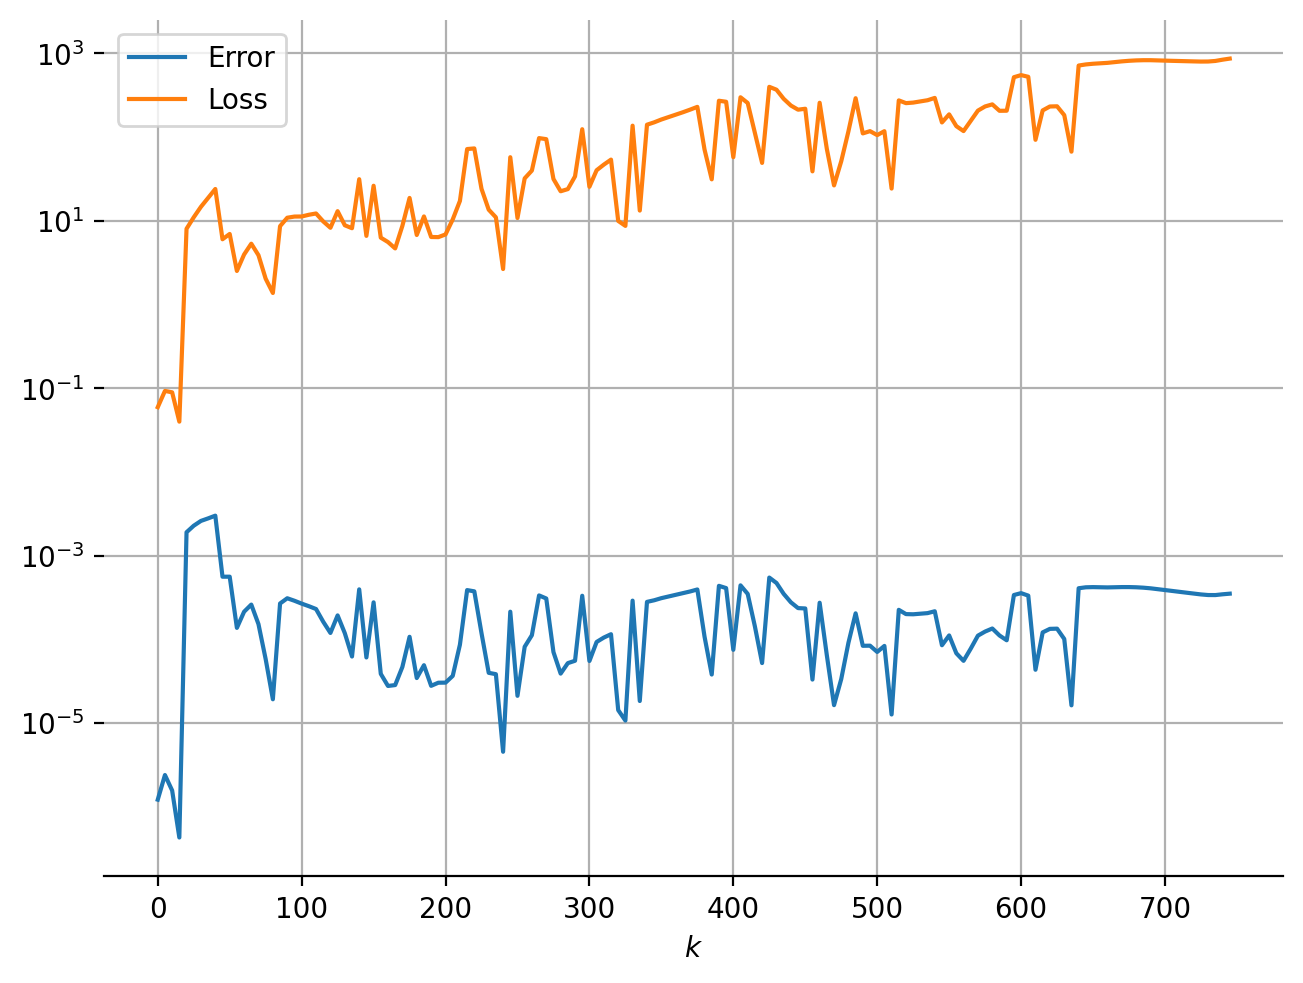

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, DATA81, c="C0", label="Error")
ax.plot(K, DATA82, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$k$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

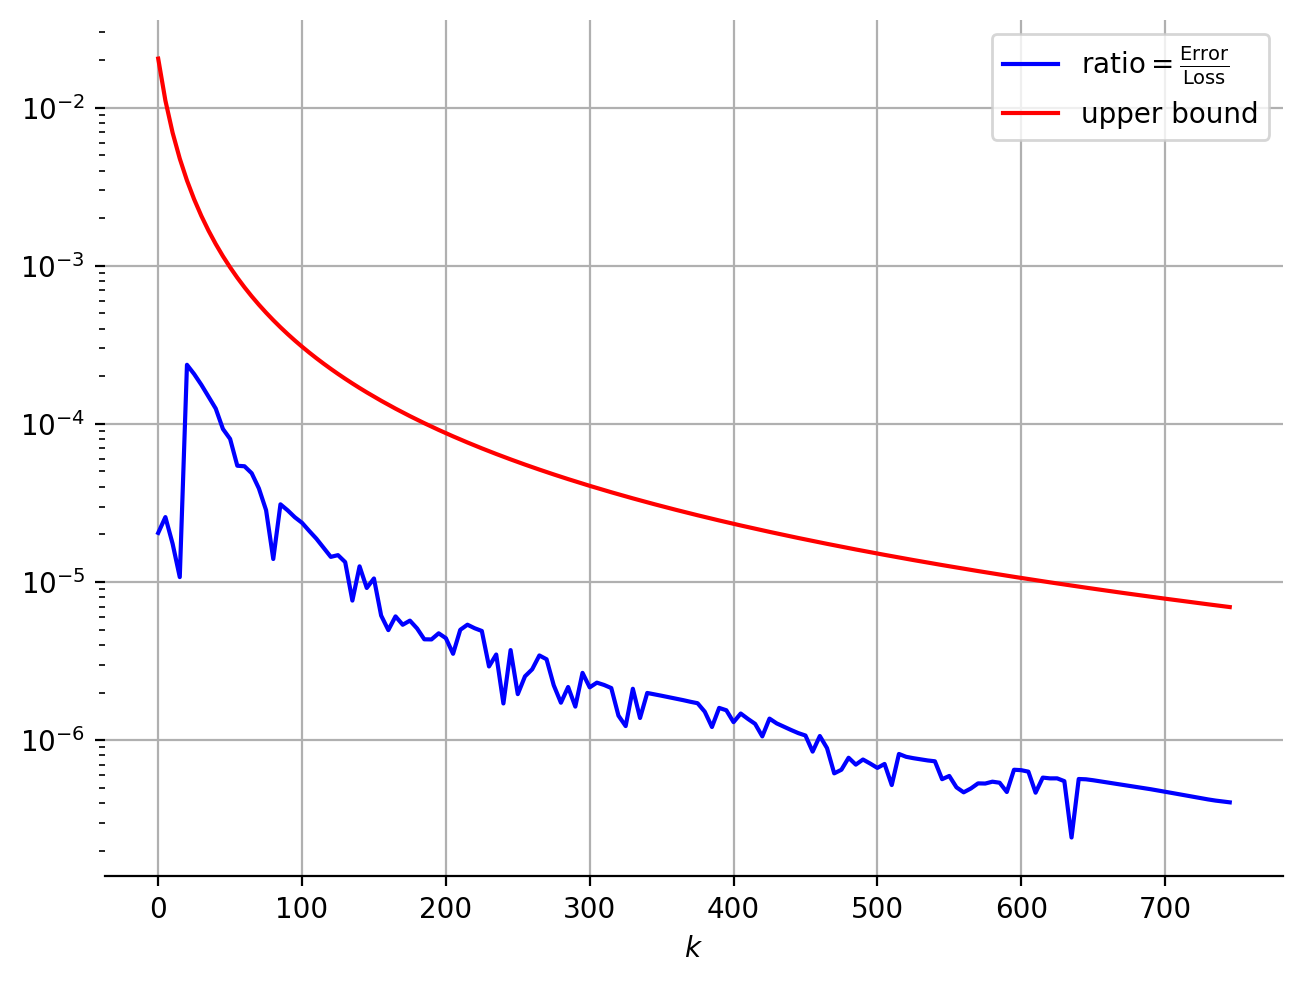

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, RATIO8, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(K, 4/(K+2*c)**2, c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$k$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

In [ ]:
k=10
c=15
Eps=np.arange(0.04,1,0.01)

In [ ]:
DATA91=[]
DATA92=[]
RATIO9=[]

for eps in Eps:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)-2*t+1
        y_e = torch.sin(np.pi*t)+torch.cos(np.pi*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt+k*t*y_t-c*y+(eps*np.pi**2+np.pi*k*t+c)*torch.sin(np.pi*t)+(eps*np.pi**2-np.pi*k*t+c)*torch.cos(np.pi*t), torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA91.append(realloss.item())
            DATA92.append(loss.item())
            RATIO9.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 327.7051
epoch = 50, loss_de = 1.2898
epoch = 100, loss_de = 0.2216
epoch = 150, loss_de = 0.1821
epoch = 200, loss_de = 0.1733
epoch = 250, loss_de = 0.1604
epoch = 300, loss_de = 0.1663
epoch = 350, loss_de = 0.1577
epoch = 400, loss_de = 0.1650
epoch = 450, loss_de = 0.1638
6.733022746630013e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 329.0764
epoch = 50, loss_de = 1.4696
epoch = 100, loss_de = 0.4378
epoch = 150, loss_de = 0.3312
epoch = 200, loss_de = 0.3047
epoch = 250, loss_de = 0.2804
epoch = 300, loss_de = 0.2883
epoch = 350, loss_de = 0.2732
epoch = 400, loss_de = 0.2851
epoch = 450, loss_de = 0.2833
0.00012682972010225058


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 330.4670
epoch = 50, loss_de = 1.6527
epoch = 100, loss_de = 0.5033
epoch = 150, loss_de = 0.3763
epoch = 200, loss_de = 0.3446
epoch = 250, loss_de = 0.3173
epoch = 300, loss_de = 0.3250
epoch = 350, loss_de = 0.3094
epoch = 400, loss_de = 0.3212
epoch = 450, loss_de = 0.3204
0.00014018191723152995


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 331.8768
epoch = 50, loss_de = 1.6254
epoch = 100, loss_de = 0.4546
epoch = 150, loss_de = 0.3268
epoch = 200, loss_de = 0.2999
epoch = 250, loss_de = 0.2727
epoch = 300, loss_de = 0.2852
epoch = 350, loss_de = 0.2653
epoch = 400, loss_de = 0.2742
epoch = 450, loss_de = 0.2765
0.0001083845054381527


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 333.3060
epoch = 50, loss_de = 0.8799
epoch = 100, loss_de = 0.2889
epoch = 150, loss_de = 0.1188
epoch = 200, loss_de = 0.0873
epoch = 250, loss_de = 0.0750
epoch = 300, loss_de = 0.0745
epoch = 350, loss_de = 0.0704
epoch = 400, loss_de = 0.0711
epoch = 450, loss_de = 0.0716
2.3494041670346633e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 334.7544
epoch = 50, loss_de = 0.9525
epoch = 100, loss_de = 0.3279
epoch = 150, loss_de = 0.1536
epoch = 200, loss_de = 0.1089
epoch = 250, loss_de = 0.0929
epoch = 300, loss_de = 0.0905
epoch = 350, loss_de = 0.0867
epoch = 400, loss_de = 0.0868
epoch = 450, loss_de = 0.0873
2.8218317311257124e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 336.2220
epoch = 50, loss_de = 1.5292
epoch = 100, loss_de = 0.3742
epoch = 150, loss_de = 0.2102
epoch = 200, loss_de = 0.1706
epoch = 250, loss_de = 0.1509
epoch = 300, loss_de = 0.1487
epoch = 350, loss_de = 0.1447
epoch = 400, loss_de = 0.1455
epoch = 450, loss_de = 0.1462
4.679730409407057e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 337.7090
epoch = 50, loss_de = 1.3654
epoch = 100, loss_de = 0.1275
epoch = 150, loss_de = 0.0938
epoch = 200, loss_de = 0.0863
epoch = 250, loss_de = 0.0792
epoch = 300, loss_de = 0.0818
epoch = 350, loss_de = 0.0777
epoch = 400, loss_de = 0.0807
epoch = 450, loss_de = 0.0807
2.4163602574844845e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 339.2152
epoch = 50, loss_de = 1.2626
epoch = 100, loss_de = 0.2469
epoch = 150, loss_de = 0.1411
epoch = 200, loss_de = 0.1159
epoch = 250, loss_de = 0.1021
epoch = 300, loss_de = 0.1024
epoch = 350, loss_de = 0.0980
epoch = 400, loss_de = 0.0990
epoch = 450, loss_de = 0.0995
2.958796358143445e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 340.7406
epoch = 50, loss_de = 0.8531
epoch = 100, loss_de = 0.0902
epoch = 150, loss_de = 0.0516
epoch = 200, loss_de = 0.0437
epoch = 250, loss_de = 0.0386
epoch = 300, loss_de = 0.0401
epoch = 350, loss_de = 0.0372
epoch = 400, loss_de = 0.0387
epoch = 450, loss_de = 0.0386
9.999089343182277e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 342.2854
epoch = 50, loss_de = 0.7959
epoch = 100, loss_de = 0.2343
epoch = 150, loss_de = 0.1825
epoch = 200, loss_de = 0.1716
epoch = 250, loss_de = 0.1573
epoch = 300, loss_de = 0.1651
epoch = 350, loss_de = 0.1544
epoch = 400, loss_de = 0.1582
epoch = 450, loss_de = 0.1609
4.2913572542602196e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 343.8494
epoch = 50, loss_de = 0.5809
epoch = 100, loss_de = 0.1240
epoch = 150, loss_de = 0.0945
epoch = 200, loss_de = 0.0864
epoch = 250, loss_de = 0.0785
epoch = 300, loss_de = 0.0821
epoch = 350, loss_de = 0.0775
epoch = 400, loss_de = 0.0796
epoch = 450, loss_de = 0.0793
1.701781184237916e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 345.4327
epoch = 50, loss_de = 0.5015
epoch = 100, loss_de = 0.1830
epoch = 150, loss_de = 0.1526
epoch = 200, loss_de = 0.1467
epoch = 250, loss_de = 0.1357
epoch = 300, loss_de = 0.1427
epoch = 350, loss_de = 0.1341
epoch = 400, loss_de = 0.1370
epoch = 450, loss_de = 0.1396
3.296859722468071e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 347.0352
epoch = 50, loss_de = 0.7318
epoch = 100, loss_de = 0.2446
epoch = 150, loss_de = 0.1976
epoch = 200, loss_de = 0.1870
epoch = 250, loss_de = 0.1723
epoch = 300, loss_de = 0.1811
epoch = 350, loss_de = 0.1697
epoch = 400, loss_de = 0.1733
epoch = 450, loss_de = 0.1767
4.219626498525031e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 348.6570
epoch = 50, loss_de = 0.4764
epoch = 100, loss_de = 0.0789
epoch = 150, loss_de = 0.0649
epoch = 200, loss_de = 0.0613
epoch = 250, loss_de = 0.0562
epoch = 300, loss_de = 0.0590
epoch = 350, loss_de = 0.0559
epoch = 400, loss_de = 0.0573
epoch = 450, loss_de = 0.0569
9.369443432660773e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 350.2981
epoch = 50, loss_de = 1.0497
epoch = 100, loss_de = 0.3208
epoch = 150, loss_de = 0.2457
epoch = 200, loss_de = 0.2282
epoch = 250, loss_de = 0.2098
epoch = 300, loss_de = 0.2181
epoch = 350, loss_de = 0.2064
epoch = 400, loss_de = 0.2103
epoch = 450, loss_de = 0.2139
5.134107414050959e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 351.9585
epoch = 50, loss_de = 1.0323
epoch = 100, loss_de = 0.3212
epoch = 150, loss_de = 0.2435
epoch = 200, loss_de = 0.2259
epoch = 250, loss_de = 0.2073
epoch = 300, loss_de = 0.2160
epoch = 350, loss_de = 0.2038
epoch = 400, loss_de = 0.2075
epoch = 450, loss_de = 0.2113
4.8324720410164446e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 353.6381
epoch = 50, loss_de = 0.4031
epoch = 100, loss_de = 0.1381
epoch = 150, loss_de = 0.1047
epoch = 200, loss_de = 0.0963
epoch = 250, loss_de = 0.0877
epoch = 300, loss_de = 0.0907
epoch = 350, loss_de = 0.0867
epoch = 400, loss_de = 0.0873
epoch = 450, loss_de = 0.0889
1.038044774759328e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 355.3370
epoch = 50, loss_de = 0.7390
epoch = 100, loss_de = 0.0794
epoch = 150, loss_de = 0.0625
epoch = 200, loss_de = 0.0590
epoch = 250, loss_de = 0.0539
epoch = 300, loss_de = 0.0562
epoch = 350, loss_de = 0.0536
epoch = 400, loss_de = 0.0543
epoch = 450, loss_de = 0.0550
5.268579116091132e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 357.0551
epoch = 50, loss_de = 0.4797
epoch = 100, loss_de = 0.0948
epoch = 150, loss_de = 0.0762
epoch = 200, loss_de = 0.0707
epoch = 250, loss_de = 0.0646
epoch = 300, loss_de = 0.0680
epoch = 350, loss_de = 0.0645
epoch = 400, loss_de = 0.0657
epoch = 450, loss_de = 0.0654
7.229555194498971e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 358.7926
epoch = 50, loss_de = 0.4745
epoch = 100, loss_de = 0.0925
epoch = 150, loss_de = 0.0752
epoch = 200, loss_de = 0.0698
epoch = 250, loss_de = 0.0644
epoch = 300, loss_de = 0.0677
epoch = 350, loss_de = 0.0642
epoch = 400, loss_de = 0.0654
epoch = 450, loss_de = 0.0650
7.649547114851885e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 360.5493
epoch = 50, loss_de = 0.3899
epoch = 100, loss_de = 0.0281
epoch = 150, loss_de = 0.0258
epoch = 200, loss_de = 0.0255
epoch = 250, loss_de = 0.0241
epoch = 300, loss_de = 0.0248
epoch = 350, loss_de = 0.0240
epoch = 400, loss_de = 0.0245
epoch = 450, loss_de = 0.0249
1.8492728486307897e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 362.3252
epoch = 50, loss_de = 0.3843
epoch = 100, loss_de = 0.0974
epoch = 150, loss_de = 0.0750
epoch = 200, loss_de = 0.0685
epoch = 250, loss_de = 0.0643
epoch = 300, loss_de = 0.0643
epoch = 350, loss_de = 0.0628
epoch = 400, loss_de = 0.0628
epoch = 450, loss_de = 0.0642
5.515651082532713e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 364.1205
epoch = 50, loss_de = 0.7832
epoch = 100, loss_de = 0.1143
epoch = 150, loss_de = 0.0774
epoch = 200, loss_de = 0.0681
epoch = 250, loss_de = 0.0632
epoch = 300, loss_de = 0.0626
epoch = 350, loss_de = 0.0616
epoch = 400, loss_de = 0.0605
epoch = 450, loss_de = 0.0624
4.511557108344277e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 365.9350
epoch = 50, loss_de = 0.7401
epoch = 100, loss_de = 0.2382
epoch = 150, loss_de = 0.1878
epoch = 200, loss_de = 0.1765
epoch = 250, loss_de = 0.1624
epoch = 300, loss_de = 0.1703
epoch = 350, loss_de = 0.1595
epoch = 400, loss_de = 0.1621
epoch = 450, loss_de = 0.1658
2.396042509644758e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 367.7688
epoch = 50, loss_de = 0.4771
epoch = 100, loss_de = 0.0915
epoch = 150, loss_de = 0.0619
epoch = 200, loss_de = 0.0543
epoch = 250, loss_de = 0.0505
epoch = 300, loss_de = 0.0499
epoch = 350, loss_de = 0.0492
epoch = 400, loss_de = 0.0484
epoch = 450, loss_de = 0.0499
3.114523678959813e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 369.6218
epoch = 50, loss_de = 0.5438
epoch = 100, loss_de = 0.1137
epoch = 150, loss_de = 0.0873
epoch = 200, loss_de = 0.0800
epoch = 250, loss_de = 0.0731
epoch = 300, loss_de = 0.0764
epoch = 350, loss_de = 0.0727
epoch = 400, loss_de = 0.0737
epoch = 450, loss_de = 0.0739
5.6219751058961265e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 371.4941
epoch = 50, loss_de = 0.5303
epoch = 100, loss_de = 0.1749
epoch = 150, loss_de = 0.1331
epoch = 200, loss_de = 0.1231
epoch = 250, loss_de = 0.1127
epoch = 300, loss_de = 0.1156
epoch = 350, loss_de = 0.1113
epoch = 400, loss_de = 0.1119
epoch = 450, loss_de = 0.1134
7.592500878672581e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 373.3857
epoch = 50, loss_de = 0.6422
epoch = 100, loss_de = 0.1669
epoch = 150, loss_de = 0.1292
epoch = 200, loss_de = 0.1209
epoch = 250, loss_de = 0.1110
epoch = 300, loss_de = 0.1136
epoch = 350, loss_de = 0.1095
epoch = 400, loss_de = 0.1101
epoch = 450, loss_de = 0.1115
6.803938049415592e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 375.2965
epoch = 50, loss_de = 0.4904
epoch = 100, loss_de = 0.1440
epoch = 150, loss_de = 0.1120
epoch = 200, loss_de = 0.1051
epoch = 250, loss_de = 0.0963
epoch = 300, loss_de = 0.0988
epoch = 350, loss_de = 0.0951
epoch = 400, loss_de = 0.0954
epoch = 450, loss_de = 0.0969
5.347133537725313e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 377.2267
epoch = 50, loss_de = 0.4617
epoch = 100, loss_de = 0.1581
epoch = 150, loss_de = 0.1205
epoch = 200, loss_de = 0.1125
epoch = 250, loss_de = 0.1031
epoch = 300, loss_de = 0.1054
epoch = 350, loss_de = 0.1016
epoch = 400, loss_de = 0.1017
epoch = 450, loss_de = 0.1035
5.4723223001929e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 379.1761
epoch = 50, loss_de = 0.6262
epoch = 100, loss_de = 0.1334
epoch = 150, loss_de = 0.0989
epoch = 200, loss_de = 0.0901
epoch = 250, loss_de = 0.0817
epoch = 300, loss_de = 0.0847
epoch = 350, loss_de = 0.0808
epoch = 400, loss_de = 0.0818
epoch = 450, loss_de = 0.0824
4.797158453584416e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 381.1447
epoch = 50, loss_de = 0.6456
epoch = 100, loss_de = 0.1250
epoch = 150, loss_de = 0.0931
epoch = 200, loss_de = 0.0854
epoch = 250, loss_de = 0.0775
epoch = 300, loss_de = 0.0801
epoch = 350, loss_de = 0.0767
epoch = 400, loss_de = 0.0775
epoch = 450, loss_de = 0.0783
4.079096015630057e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 383.1326
epoch = 50, loss_de = 0.4980
epoch = 100, loss_de = 0.0796
epoch = 150, loss_de = 0.0649
epoch = 200, loss_de = 0.0609
epoch = 250, loss_de = 0.0555
epoch = 300, loss_de = 0.0585
epoch = 350, loss_de = 0.0554
epoch = 400, loss_de = 0.0565
epoch = 450, loss_de = 0.0564
3.076448592764791e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 385.1399
epoch = 50, loss_de = 0.1184
epoch = 100, loss_de = 0.0197
epoch = 150, loss_de = 0.0194
epoch = 200, loss_de = 0.0182
epoch = 250, loss_de = 0.0181
epoch = 300, loss_de = 0.0192
epoch = 350, loss_de = 0.0181
epoch = 400, loss_de = 0.0184
epoch = 450, loss_de = 0.0188
6.181659273352125e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 387.1663
epoch = 50, loss_de = 0.2165
epoch = 100, loss_de = 0.0442
epoch = 150, loss_de = 0.0336
epoch = 200, loss_de = 0.0319
epoch = 250, loss_de = 0.0291
epoch = 300, loss_de = 0.0309
epoch = 350, loss_de = 0.0291
epoch = 400, loss_de = 0.0297
epoch = 450, loss_de = 0.0300
1.0811710353664239e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 389.2120
epoch = 50, loss_de = 0.1620
epoch = 100, loss_de = 0.0398
epoch = 150, loss_de = 0.0325
epoch = 200, loss_de = 0.0309
epoch = 250, loss_de = 0.0284
epoch = 300, loss_de = 0.0301
epoch = 350, loss_de = 0.0284
epoch = 400, loss_de = 0.0290
epoch = 450, loss_de = 0.0292
9.67041842159233e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 391.2770
epoch = 50, loss_de = 0.2824
epoch = 100, loss_de = 0.0266
epoch = 150, loss_de = 0.0253
epoch = 200, loss_de = 0.0242
epoch = 250, loss_de = 0.0236
epoch = 300, loss_de = 0.0249
epoch = 350, loss_de = 0.0239
epoch = 400, loss_de = 0.0240
epoch = 450, loss_de = 0.0241
6.530065093102166e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 393.3613
epoch = 50, loss_de = 0.3093
epoch = 100, loss_de = 0.0731
epoch = 150, loss_de = 0.0581
epoch = 200, loss_de = 0.0537
epoch = 250, loss_de = 0.0509
epoch = 300, loss_de = 0.0518
epoch = 350, loss_de = 0.0504
epoch = 400, loss_de = 0.0502
epoch = 450, loss_de = 0.0511
1.8264370282849995e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 395.4648
epoch = 50, loss_de = 0.2103
epoch = 100, loss_de = 0.0621
epoch = 150, loss_de = 0.0522
epoch = 200, loss_de = 0.0488
epoch = 250, loss_de = 0.0465
epoch = 300, loss_de = 0.0477
epoch = 350, loss_de = 0.0461
epoch = 400, loss_de = 0.0466
epoch = 450, loss_de = 0.0470
1.6738960084694554e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 397.5876
epoch = 50, loss_de = 0.1802
epoch = 100, loss_de = 0.0508
epoch = 150, loss_de = 0.0429
epoch = 200, loss_de = 0.0398
epoch = 250, loss_de = 0.0384
epoch = 300, loss_de = 0.0393
epoch = 350, loss_de = 0.0382
epoch = 400, loss_de = 0.0381
epoch = 450, loss_de = 0.0388
1.1264390877840924e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 399.7296
epoch = 50, loss_de = 0.2727
epoch = 100, loss_de = 0.0256
epoch = 150, loss_de = 0.0247
epoch = 200, loss_de = 0.0237
epoch = 250, loss_de = 0.0229
epoch = 300, loss_de = 0.0243
epoch = 350, loss_de = 0.0232
epoch = 400, loss_de = 0.0233
epoch = 450, loss_de = 0.0236
5.271965051178995e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 401.8910
epoch = 50, loss_de = 0.2657
epoch = 100, loss_de = 0.0359
epoch = 150, loss_de = 0.0325
epoch = 200, loss_de = 0.0312
epoch = 250, loss_de = 0.0297
epoch = 300, loss_de = 0.0313
epoch = 350, loss_de = 0.0299
epoch = 400, loss_de = 0.0301
epoch = 450, loss_de = 0.0304
7.335037253142218e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 404.0717
epoch = 50, loss_de = 0.6668
epoch = 100, loss_de = 0.0912
epoch = 150, loss_de = 0.0734
epoch = 200, loss_de = 0.0683
epoch = 250, loss_de = 0.0628
epoch = 300, loss_de = 0.0659
epoch = 350, loss_de = 0.0627
epoch = 400, loss_de = 0.0636
epoch = 450, loss_de = 0.0637
2.2199508293851977e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 406.2715
epoch = 50, loss_de = 0.6135
epoch = 100, loss_de = 0.0644
epoch = 150, loss_de = 0.0535
epoch = 200, loss_de = 0.0503
epoch = 250, loss_de = 0.0487
epoch = 300, loss_de = 0.0494
epoch = 350, loss_de = 0.0488
epoch = 400, loss_de = 0.0484
epoch = 450, loss_de = 0.0487
1.2933579682794516e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 408.4907
epoch = 50, loss_de = 0.6517
epoch = 100, loss_de = 0.1113
epoch = 150, loss_de = 0.0805
epoch = 200, loss_de = 0.0715
epoch = 250, loss_de = 0.0679
epoch = 300, loss_de = 0.0678
epoch = 350, loss_de = 0.0667
epoch = 400, loss_de = 0.0654
epoch = 450, loss_de = 0.0675
1.892321051855106e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 410.7291
epoch = 50, loss_de = 0.4941
epoch = 100, loss_de = 0.0836
epoch = 150, loss_de = 0.0639
epoch = 200, loss_de = 0.0575
epoch = 250, loss_de = 0.0552
epoch = 300, loss_de = 0.0557
epoch = 350, loss_de = 0.0546
epoch = 400, loss_de = 0.0536
epoch = 450, loss_de = 0.0552
1.3738084589931532e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 412.9868
epoch = 50, loss_de = 0.3720
epoch = 100, loss_de = 0.0867
epoch = 150, loss_de = 0.0722
epoch = 200, loss_de = 0.0668
epoch = 250, loss_de = 0.0638
epoch = 300, loss_de = 0.0653
epoch = 350, loss_de = 0.0631
epoch = 400, loss_de = 0.0634
epoch = 450, loss_de = 0.0644
1.9402909856580663e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 415.2638
epoch = 50, loss_de = 0.2317
epoch = 100, loss_de = 0.1000
epoch = 150, loss_de = 0.0884
epoch = 200, loss_de = 0.0836
epoch = 250, loss_de = 0.0792
epoch = 300, loss_de = 0.0819
epoch = 350, loss_de = 0.0783
epoch = 400, loss_de = 0.0803
epoch = 450, loss_de = 0.0796
3.1405766094394494e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 417.5600
epoch = 50, loss_de = 0.2575
epoch = 100, loss_de = 0.1017
epoch = 150, loss_de = 0.0876
epoch = 200, loss_de = 0.0823
epoch = 250, loss_de = 0.0782
epoch = 300, loss_de = 0.0804
epoch = 350, loss_de = 0.0773
epoch = 400, loss_de = 0.0787
epoch = 450, loss_de = 0.0787
2.723285660977126e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 419.8755
epoch = 50, loss_de = 0.3765
epoch = 100, loss_de = 0.1186
epoch = 150, loss_de = 0.0948
epoch = 200, loss_de = 0.0878
epoch = 250, loss_de = 0.0831
epoch = 300, loss_de = 0.0848
epoch = 350, loss_de = 0.0824
epoch = 400, loss_de = 0.0821
epoch = 450, loss_de = 0.0835
2.5482686396571808e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 422.2102
epoch = 50, loss_de = 0.4163
epoch = 100, loss_de = 0.1296
epoch = 150, loss_de = 0.1013
epoch = 200, loss_de = 0.0933
epoch = 250, loss_de = 0.0882
epoch = 300, loss_de = 0.0899
epoch = 350, loss_de = 0.0874
epoch = 400, loss_de = 0.0868
epoch = 450, loss_de = 0.0886
2.6671605155570433e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 424.5642
epoch = 50, loss_de = 0.4529
epoch = 100, loss_de = 0.1223
epoch = 150, loss_de = 0.0929
epoch = 200, loss_de = 0.0842
epoch = 250, loss_de = 0.0800
epoch = 300, loss_de = 0.0811
epoch = 350, loss_de = 0.0791
epoch = 400, loss_de = 0.0779
epoch = 450, loss_de = 0.0802
2.0680599845945835e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 426.9376
epoch = 50, loss_de = 0.8046
epoch = 100, loss_de = 0.1034
epoch = 150, loss_de = 0.0751
epoch = 200, loss_de = 0.0663
epoch = 250, loss_de = 0.0636
epoch = 300, loss_de = 0.0640
epoch = 350, loss_de = 0.0628
epoch = 400, loss_de = 0.0612
epoch = 450, loss_de = 0.0632
1.2512940656961291e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 429.3301
epoch = 50, loss_de = 0.3211
epoch = 100, loss_de = 0.0543
epoch = 150, loss_de = 0.0453
epoch = 200, loss_de = 0.0414
epoch = 250, loss_de = 0.0411
epoch = 300, loss_de = 0.0423
epoch = 350, loss_de = 0.0415
epoch = 400, loss_de = 0.0410
epoch = 450, loss_de = 0.0413
6.386913469214051e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 431.7419
epoch = 50, loss_de = 0.2975
epoch = 100, loss_de = 0.0683
epoch = 150, loss_de = 0.0623
epoch = 200, loss_de = 0.0589
epoch = 250, loss_de = 0.0564
epoch = 300, loss_de = 0.0595
epoch = 350, loss_de = 0.0569
epoch = 400, loss_de = 0.0574
epoch = 450, loss_de = 0.0574
1.3405698382484843e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 434.1731
epoch = 50, loss_de = 0.2882
epoch = 100, loss_de = 0.0965
epoch = 150, loss_de = 0.0832
epoch = 200, loss_de = 0.0779
epoch = 250, loss_de = 0.0731
epoch = 300, loss_de = 0.0773
epoch = 350, loss_de = 0.0735
epoch = 400, loss_de = 0.0745
epoch = 450, loss_de = 0.0743
2.055327286143438e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 436.6234
epoch = 50, loss_de = 0.6264
epoch = 100, loss_de = 0.1057
epoch = 150, loss_de = 0.0892
epoch = 200, loss_de = 0.0833
epoch = 250, loss_de = 0.0779
epoch = 300, loss_de = 0.0822
epoch = 350, loss_de = 0.0783
epoch = 400, loss_de = 0.0793
epoch = 450, loss_de = 0.0790
2.1579476197075564e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 439.0931
epoch = 50, loss_de = 0.5874
epoch = 100, loss_de = 0.1040
epoch = 150, loss_de = 0.0894
epoch = 200, loss_de = 0.0836
epoch = 250, loss_de = 0.0785
epoch = 300, loss_de = 0.0829
epoch = 350, loss_de = 0.0790
epoch = 400, loss_de = 0.0799
epoch = 450, loss_de = 0.0797
2.112044057867024e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 441.5820
epoch = 50, loss_de = 0.5441
epoch = 100, loss_de = 0.0899
epoch = 150, loss_de = 0.0803
epoch = 200, loss_de = 0.0762
epoch = 250, loss_de = 0.0727
epoch = 300, loss_de = 0.0761
epoch = 350, loss_de = 0.0732
epoch = 400, loss_de = 0.0737
epoch = 450, loss_de = 0.0737
1.748261183820432e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 444.0902
epoch = 50, loss_de = 0.6378
epoch = 100, loss_de = 0.0940
epoch = 150, loss_de = 0.0758
epoch = 200, loss_de = 0.0681
epoch = 250, loss_de = 0.0675
epoch = 300, loss_de = 0.0674
epoch = 350, loss_de = 0.0671
epoch = 400, loss_de = 0.0653
epoch = 450, loss_de = 0.0675
9.454055884816626e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 446.6176
epoch = 50, loss_de = 0.6877
epoch = 100, loss_de = 0.1215
epoch = 150, loss_de = 0.1012
epoch = 200, loss_de = 0.0948
epoch = 250, loss_de = 0.0886
epoch = 300, loss_de = 0.0929
epoch = 350, loss_de = 0.0891
epoch = 400, loss_de = 0.0898
epoch = 450, loss_de = 0.0895
2.2365447875927202e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 449.1644
epoch = 50, loss_de = 0.6804
epoch = 100, loss_de = 0.1264
epoch = 150, loss_de = 0.1041
epoch = 200, loss_de = 0.0971
epoch = 250, loss_de = 0.0905
epoch = 300, loss_de = 0.0951
epoch = 350, loss_de = 0.0909
epoch = 400, loss_de = 0.0917
epoch = 450, loss_de = 0.0914
2.258103677377221e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 451.7303
epoch = 50, loss_de = 0.7172
epoch = 100, loss_de = 0.1244
epoch = 150, loss_de = 0.1037
epoch = 200, loss_de = 0.0968
epoch = 250, loss_de = 0.0904
epoch = 300, loss_de = 0.0950
epoch = 350, loss_de = 0.0908
epoch = 400, loss_de = 0.0916
epoch = 450, loss_de = 0.0913
2.2038038878235966e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 454.3156
epoch = 50, loss_de = 0.6716
epoch = 100, loss_de = 0.1221
epoch = 150, loss_de = 0.1023
epoch = 200, loss_de = 0.0956
epoch = 250, loss_de = 0.0897
epoch = 300, loss_de = 0.0942
epoch = 350, loss_de = 0.0901
epoch = 400, loss_de = 0.0909
epoch = 450, loss_de = 0.0906
2.129921767846099e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 456.9202
epoch = 50, loss_de = 0.4666
epoch = 100, loss_de = 0.1181
epoch = 150, loss_de = 0.1001
epoch = 200, loss_de = 0.0937
epoch = 250, loss_de = 0.0883
epoch = 300, loss_de = 0.0927
epoch = 350, loss_de = 0.0888
epoch = 400, loss_de = 0.0895
epoch = 450, loss_de = 0.0893
2.03705303647439e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 459.5439
epoch = 50, loss_de = 0.3540
epoch = 100, loss_de = 0.1121
epoch = 150, loss_de = 0.0968
epoch = 200, loss_de = 0.0908
epoch = 250, loss_de = 0.0860
epoch = 300, loss_de = 0.0904
epoch = 350, loss_de = 0.0866
epoch = 400, loss_de = 0.0872
epoch = 450, loss_de = 0.0872
1.9188382793799974e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 462.1870
epoch = 50, loss_de = 0.3806
epoch = 100, loss_de = 0.1030
epoch = 150, loss_de = 0.0915
epoch = 200, loss_de = 0.0861
epoch = 250, loss_de = 0.0822
epoch = 300, loss_de = 0.0864
epoch = 350, loss_de = 0.0828
epoch = 400, loss_de = 0.0833
epoch = 450, loss_de = 0.0835
1.7501342881587334e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 464.8494
epoch = 50, loss_de = 0.5003
epoch = 100, loss_de = 0.0920
epoch = 150, loss_de = 0.0844
epoch = 200, loss_de = 0.0796
epoch = 250, loss_de = 0.0769
epoch = 300, loss_de = 0.0808
epoch = 350, loss_de = 0.0775
epoch = 400, loss_de = 0.0779
epoch = 450, loss_de = 0.0783
1.5272166820068378e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 467.5309
epoch = 50, loss_de = 0.4455
epoch = 100, loss_de = 0.0837
epoch = 150, loss_de = 0.0781
epoch = 200, loss_de = 0.0737
epoch = 250, loss_de = 0.0723
epoch = 300, loss_de = 0.0758
epoch = 350, loss_de = 0.0729
epoch = 400, loss_de = 0.0730
epoch = 450, loss_de = 0.0737
1.309159301854379e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 470.2318
epoch = 50, loss_de = 0.3208
epoch = 100, loss_de = 0.0778
epoch = 150, loss_de = 0.0743
epoch = 200, loss_de = 0.0699
epoch = 250, loss_de = 0.0695
epoch = 300, loss_de = 0.0725
epoch = 350, loss_de = 0.0700
epoch = 400, loss_de = 0.0699
epoch = 450, loss_de = 0.0708
1.1231269354539108e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 472.9519
epoch = 50, loss_de = 0.4141
epoch = 100, loss_de = 0.0766
epoch = 150, loss_de = 0.0715
epoch = 200, loss_de = 0.0665
epoch = 250, loss_de = 0.0672
epoch = 300, loss_de = 0.0696
epoch = 350, loss_de = 0.0676
epoch = 400, loss_de = 0.0672
epoch = 450, loss_de = 0.0684
9.435843821847811e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 475.6914
epoch = 50, loss_de = 0.6297
epoch = 100, loss_de = 0.0758
epoch = 150, loss_de = 0.0706
epoch = 200, loss_de = 0.0647
epoch = 250, loss_de = 0.0662
epoch = 300, loss_de = 0.0680
epoch = 350, loss_de = 0.0664
epoch = 400, loss_de = 0.0656
epoch = 450, loss_de = 0.0672
7.984810395100794e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 478.4500
epoch = 50, loss_de = 0.6473
epoch = 100, loss_de = 0.0825
epoch = 150, loss_de = 0.0736
epoch = 200, loss_de = 0.0663
epoch = 250, loss_de = 0.0681
epoch = 300, loss_de = 0.0694
epoch = 350, loss_de = 0.0681
epoch = 400, loss_de = 0.0669
epoch = 450, loss_de = 0.0688
7.228490517263708e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 481.2280
epoch = 50, loss_de = 0.3836
epoch = 100, loss_de = 0.0786
epoch = 150, loss_de = 0.0711
epoch = 200, loss_de = 0.0644
epoch = 250, loss_de = 0.0662
epoch = 300, loss_de = 0.0677
epoch = 350, loss_de = 0.0664
epoch = 400, loss_de = 0.0652
epoch = 450, loss_de = 0.0670
6.870700985928124e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 484.0253
epoch = 50, loss_de = 0.5818
epoch = 100, loss_de = 0.0657
epoch = 150, loss_de = 0.0643
epoch = 200, loss_de = 0.0596
epoch = 250, loss_de = 0.0601
epoch = 300, loss_de = 0.0636
epoch = 350, loss_de = 0.0607
epoch = 400, loss_de = 0.0606
epoch = 450, loss_de = 0.0618
8.856049475980399e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 486.8417
epoch = 50, loss_de = 0.4068
epoch = 100, loss_de = 0.0726
epoch = 150, loss_de = 0.0639
epoch = 200, loss_de = 0.0576
epoch = 250, loss_de = 0.0578
epoch = 300, loss_de = 0.0617
epoch = 350, loss_de = 0.0582
epoch = 400, loss_de = 0.0583
epoch = 450, loss_de = 0.0597
9.061936339094245e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 489.6775
epoch = 50, loss_de = 0.6234
epoch = 100, loss_de = 0.0777
epoch = 150, loss_de = 0.0724
epoch = 200, loss_de = 0.0664
epoch = 250, loss_de = 0.0681
epoch = 300, loss_de = 0.0702
epoch = 350, loss_de = 0.0686
epoch = 400, loss_de = 0.0675
epoch = 450, loss_de = 0.0692
7.02995919255045e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 492.5325
epoch = 50, loss_de = 0.5980
epoch = 100, loss_de = 0.1444
epoch = 150, loss_de = 0.1175
epoch = 200, loss_de = 0.0972
epoch = 250, loss_de = 0.0952
epoch = 300, loss_de = 0.0997
epoch = 350, loss_de = 0.0929
epoch = 400, loss_de = 0.0943
epoch = 450, loss_de = 0.0964
1.6162508700290346e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 495.4068
epoch = 50, loss_de = 0.3915
epoch = 100, loss_de = 0.0848
epoch = 150, loss_de = 0.0693
epoch = 200, loss_de = 0.0608
epoch = 250, loss_de = 0.0611
epoch = 300, loss_de = 0.0653
epoch = 350, loss_de = 0.0612
epoch = 400, loss_de = 0.0614
epoch = 450, loss_de = 0.0631
9.530099305266049e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 498.3003
epoch = 50, loss_de = 0.4970
epoch = 100, loss_de = 0.0683
epoch = 150, loss_de = 0.0673
epoch = 200, loss_de = 0.0614
epoch = 250, loss_de = 0.0628
epoch = 300, loss_de = 0.0665
epoch = 350, loss_de = 0.0633
epoch = 400, loss_de = 0.0631
epoch = 450, loss_de = 0.0646
8.447074151263223e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 501.2131
epoch = 50, loss_de = 0.5110
epoch = 100, loss_de = 0.0839
epoch = 150, loss_de = 0.0783
epoch = 200, loss_de = 0.0703
epoch = 250, loss_de = 0.0730
epoch = 300, loss_de = 0.0749
epoch = 350, loss_de = 0.0732
epoch = 400, loss_de = 0.0718
epoch = 450, loss_de = 0.0740
6.44433612251305e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 504.1452
epoch = 50, loss_de = 0.4874
epoch = 100, loss_de = 0.0797
epoch = 150, loss_de = 0.0763
epoch = 200, loss_de = 0.0691
epoch = 250, loss_de = 0.0719
epoch = 300, loss_de = 0.0743
epoch = 350, loss_de = 0.0723
epoch = 400, loss_de = 0.0712
epoch = 450, loss_de = 0.0732
6.710185402880597e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 507.0966
epoch = 50, loss_de = 0.3561
epoch = 100, loss_de = 0.0764
epoch = 150, loss_de = 0.0760
epoch = 200, loss_de = 0.0695
epoch = 250, loss_de = 0.0720
epoch = 300, loss_de = 0.0751
epoch = 350, loss_de = 0.0726
epoch = 400, loss_de = 0.0718
epoch = 450, loss_de = 0.0736
7.445733558597567e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 510.0673
epoch = 50, loss_de = 0.2563
epoch = 100, loss_de = 0.0787
epoch = 150, loss_de = 0.0788
epoch = 200, loss_de = 0.0726
epoch = 250, loss_de = 0.0745
epoch = 300, loss_de = 0.0780
epoch = 350, loss_de = 0.0752
epoch = 400, loss_de = 0.0746
epoch = 450, loss_de = 0.0762
8.293183668683923e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 513.0572
epoch = 50, loss_de = 0.1994
epoch = 100, loss_de = 0.0817
epoch = 150, loss_de = 0.0812
epoch = 200, loss_de = 0.0751
epoch = 250, loss_de = 0.0766
epoch = 300, loss_de = 0.0804
epoch = 350, loss_de = 0.0774
epoch = 400, loss_de = 0.0769
epoch = 450, loss_de = 0.0784
8.838050007398124e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 516.0663
epoch = 50, loss_de = 0.2087
epoch = 100, loss_de = 0.0831
epoch = 150, loss_de = 0.0827
epoch = 200, loss_de = 0.0766
epoch = 250, loss_de = 0.0778
epoch = 300, loss_de = 0.0819
epoch = 350, loss_de = 0.0787
epoch = 400, loss_de = 0.0782
epoch = 450, loss_de = 0.0797
9.159642218037334e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 519.0948
epoch = 50, loss_de = 0.2933
epoch = 100, loss_de = 0.0828
epoch = 150, loss_de = 0.0831
epoch = 200, loss_de = 0.0770
epoch = 250, loss_de = 0.0781
epoch = 300, loss_de = 0.0824
epoch = 350, loss_de = 0.0790
epoch = 400, loss_de = 0.0786
epoch = 450, loss_de = 0.0801
9.233014566234488e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 522.1425
epoch = 50, loss_de = 0.3972
epoch = 100, loss_de = 0.0829
epoch = 150, loss_de = 0.0832
epoch = 200, loss_de = 0.0769
epoch = 250, loss_de = 0.0781
epoch = 300, loss_de = 0.0825
epoch = 350, loss_de = 0.0791
epoch = 400, loss_de = 0.0786
epoch = 450, loss_de = 0.0802
9.151698918685724e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 525.2095
epoch = 50, loss_de = 0.4372
epoch = 100, loss_de = 0.0830
epoch = 150, loss_de = 0.0833
epoch = 200, loss_de = 0.0768
epoch = 250, loss_de = 0.0782
epoch = 300, loss_de = 0.0826
epoch = 350, loss_de = 0.0792
epoch = 400, loss_de = 0.0787
epoch = 450, loss_de = 0.0803
9.012738360070216e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 528.2957
epoch = 50, loss_de = 0.3916
epoch = 100, loss_de = 0.0829
epoch = 150, loss_de = 0.0836
epoch = 200, loss_de = 0.0769
epoch = 250, loss_de = 0.0786
epoch = 300, loss_de = 0.0830
epoch = 350, loss_de = 0.0795
epoch = 400, loss_de = 0.0790
epoch = 450, loss_de = 0.0807
8.870065926203097e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 531.4013
epoch = 50, loss_de = 0.8709
epoch = 100, loss_de = 0.3031
epoch = 150, loss_de = 0.2731
epoch = 200, loss_de = 0.2585
epoch = 250, loss_de = 0.2503
epoch = 300, loss_de = 0.2626
epoch = 350, loss_de = 0.2487
epoch = 400, loss_de = 0.2506
epoch = 450, loss_de = 0.2573
6.910727734066313e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 534.5261
epoch = 50, loss_de = 0.9140
epoch = 100, loss_de = 0.3063
epoch = 150, loss_de = 0.2766
epoch = 200, loss_de = 0.2613
epoch = 250, loss_de = 0.2533
epoch = 300, loss_de = 0.2655
epoch = 350, loss_de = 0.2516
epoch = 400, loss_de = 0.2534
epoch = 450, loss_de = 0.2602
6.831054179201601e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 537.6701
epoch = 50, loss_de = 0.9526
epoch = 100, loss_de = 0.3081
epoch = 150, loss_de = 0.2783
epoch = 200, loss_de = 0.2621
epoch = 250, loss_de = 0.2539
epoch = 300, loss_de = 0.2656
epoch = 350, loss_de = 0.2517
epoch = 400, loss_de = 0.2533
epoch = 450, loss_de = 0.2601
6.6201364461448975e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 540.8334
epoch = 50, loss_de = 0.9758
epoch = 100, loss_de = 0.3092
epoch = 150, loss_de = 0.2787
epoch = 200, loss_de = 0.2575
epoch = 250, loss_de = 0.2424
epoch = 300, loss_de = 0.2419
epoch = 350, loss_de = 0.2280
epoch = 400, loss_de = 0.2251
epoch = 450, loss_de = 0.2300
4.736590653919848e-06


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 544.0161
epoch = 50, loss_de = 0.9850
epoch = 100, loss_de = 0.3102
epoch = 150, loss_de = 0.2728
epoch = 200, loss_de = 0.2097
epoch = 250, loss_de = 0.1996
epoch = 300, loss_de = 0.1992
epoch = 350, loss_de = 0.1932
epoch = 400, loss_de = 0.1903
epoch = 450, loss_de = 0.1949
2.61458512795798e-06


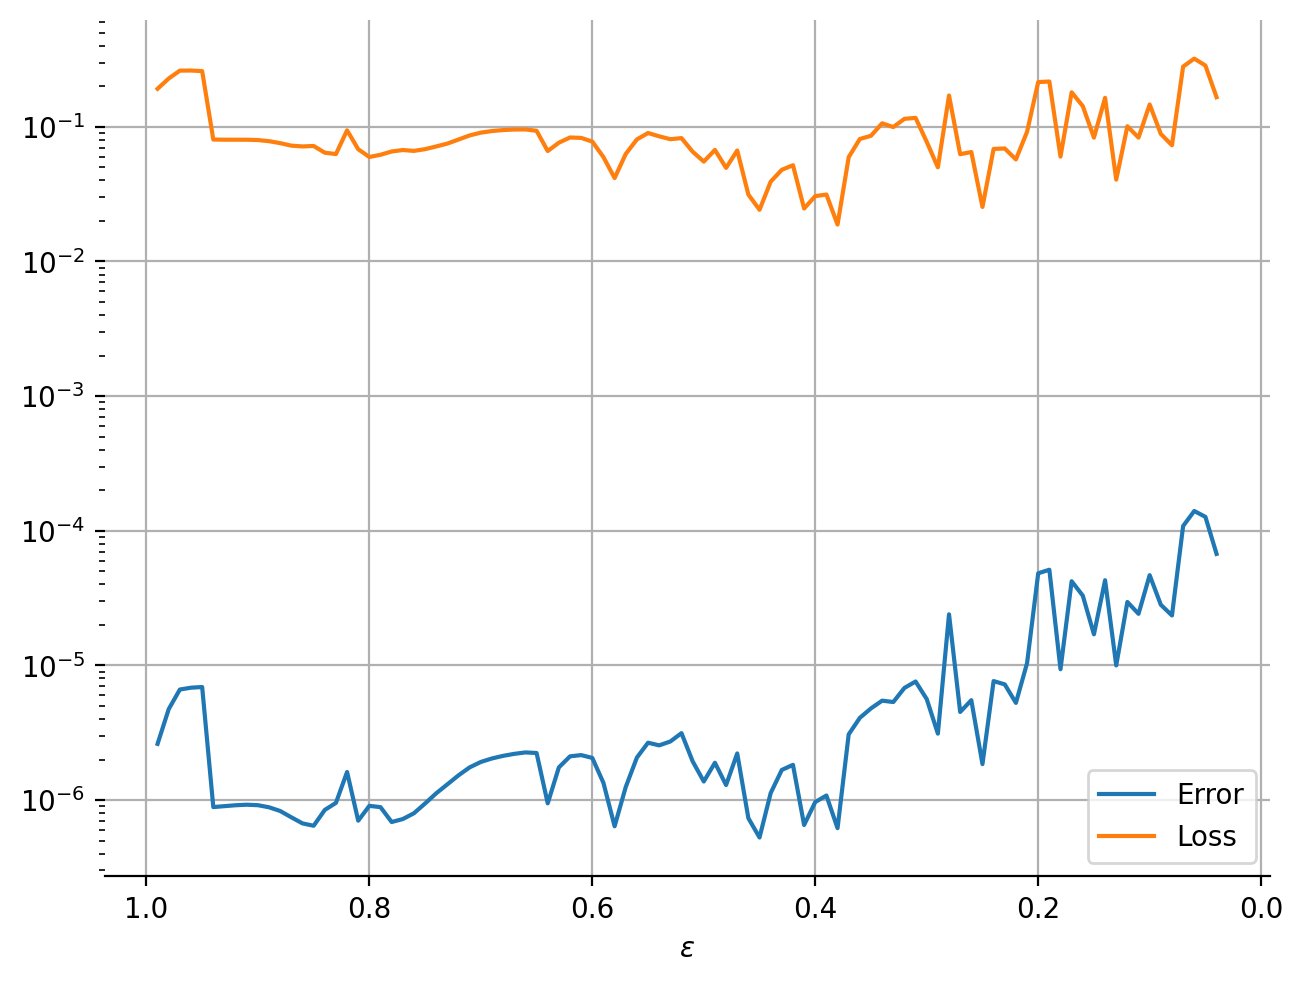

In [ ]:
fig, ax = plt.subplots()
ax.plot(Eps, DATA91, c="C0", label="Error")
ax.plot(Eps, DATA92, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\epsilon$",
)
ax.grid()
ax.legend()
ax.invert_xaxis()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

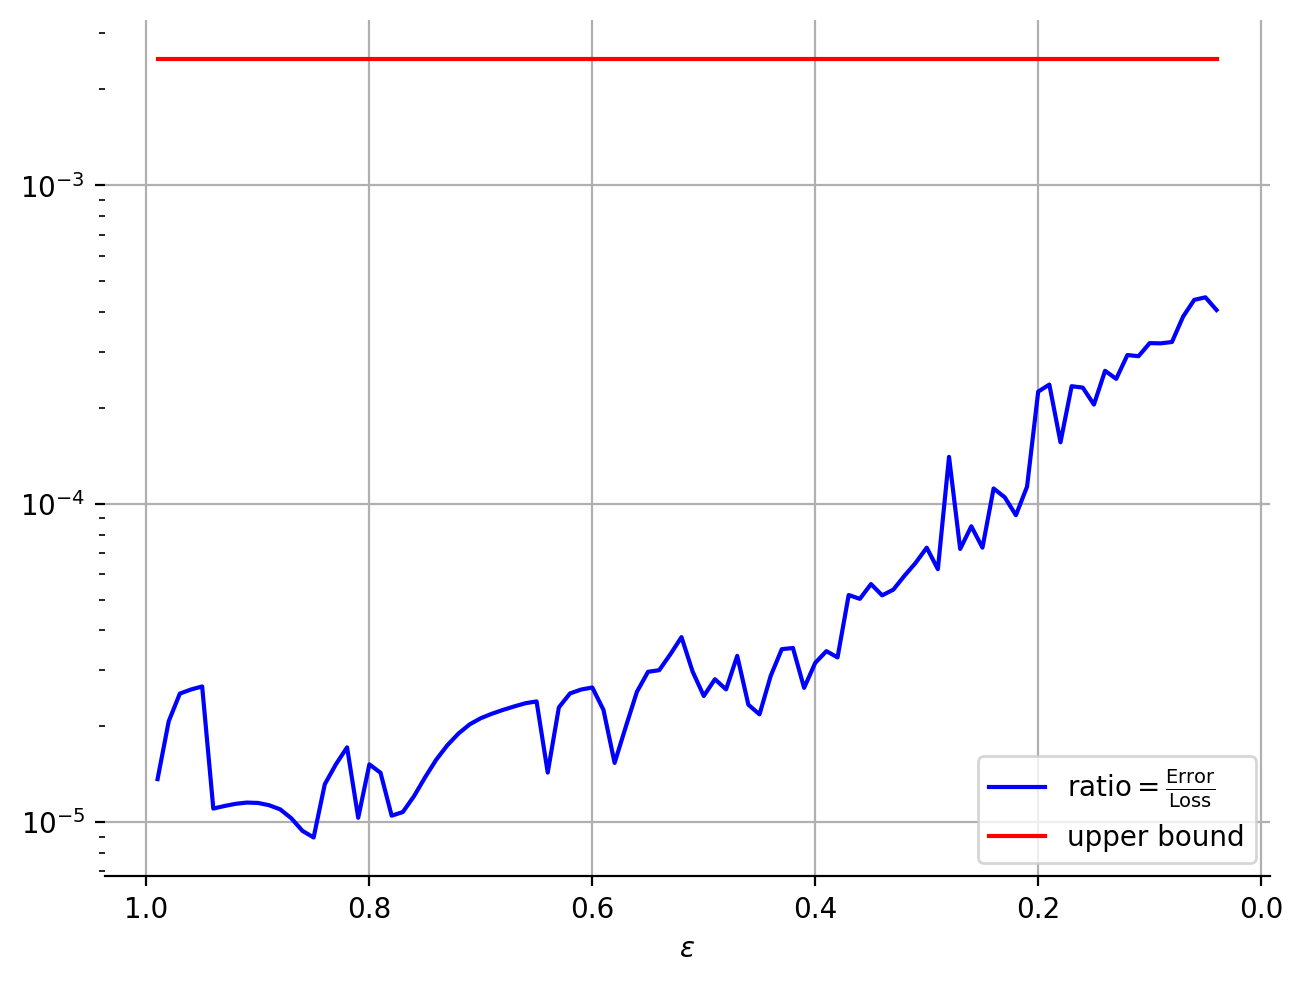

In [ ]:
fig, ax = plt.subplots()
ax.plot(Eps, RATIO9, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(Eps, [4/(k+2*c)**2]*len(Eps), c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\epsilon$",
)
ax.grid()
ax.legend()
ax.invert_xaxis()
ax.spines[["top", "right", "left"]].set_visible(False)
pass